=================================Optimization and Deep Learning==================================

In [43]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

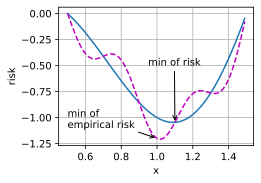

In [ ]:
# the minimum of the empirical risk on a training dataset may be at a different location from the minimum of the risk (generalization error).

def f(x):
    return x * torch.cos(np.pi * x)

def g(x):
    return f(x) + 0.2 * torch.cos(5 * np.pi * x)
    
def annotate(text, xy, xytext):  #@save
    d2l.plt.gca().annotate(text, xy=xy, xytext=xytext, arrowprops=dict(arrowstyle='->'))

x = torch.arange(0.5, 1.5, 0.01)
d2l.set_figsize((4.5, 2.5))
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('min of\nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))

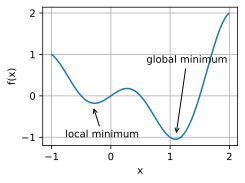

In [46]:
x = torch.arange(-1.0, 2.0, 0.01)
d2l.plot(x, [f(x), ], 'x', 'f(x)')
annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
annotate('global minimum', (1.1, -0.95), (0.6, 0.8))

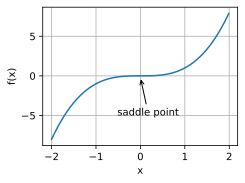

In [47]:
# Saddle Points
# A saddle point is a critical point of a function where the gradient is zero, but the point is neither a local minimum nor a local maximum.
x = torch.arange(-2.0, 2.0, 0.01)
d2l.plot(x, [x**3], 'x', 'f(x)')
annotate('saddle point', (0, -0.2), (-0.52, -5.0))

#### Saddle Point — Definition and Explanation
A **saddle point** is a critical point of a function where the gradient is zero, but the point is **neither a local minimum nor a local maximum**.

##### Formal Definition

Let  $f : \mathbb{R}^n \to \mathbb{R}$
be a differentiable function, and let $ \mathbf{x}^* $ satisfy  $\nabla f(\mathbf{x}^*) = 0.$

Then $ \mathbf{x}^* $ is a **saddle point** if  
$
\exists\ \mathbf{u}, \mathbf{v} \in \mathbb{R}^n
\quad \text{such that} \quad
f(\mathbf{u}) > f(\mathbf{x}^*) \quad \text{and} \quad f(\mathbf{v}) < f(\mathbf{x}^*).
$

In other words, the function increases in some directions and decreases in others near $\mathbf{x}^*$.

##### Hessian Interpretation

If $f$ is twice differentiable, and the **Hessian** $H(f)(\mathbf{x}^*)$ is **indefinite** (i.e., has both positive and negative eigenvalues), then $\mathbf{x}^*$ is a **saddle point**.

$
H(f)(\mathbf{x}^*) \text{ indefinite} \;\Rightarrow\; \text{saddle point.}
$

##### Example

For $f(x, y) = x^2 - y^2,$
we have: $\nabla f = (2x, -2y) = 0 \Rightarrow (x, y) = (0, 0)$ and
$
H(f) =
\begin{bmatrix}
2 & 0 \\
0 & -2
\end{bmatrix}
$
has eigenvalues $+2$ and $-2$ → **indefinite** → **saddle point** at $(0, 0)$.

Summary:
We assume that the input of a function is a k-dimensional vector and its output is a scalar, so its Hessian matrix will have k eigenvalues. At critical point ($ \nabla f(\mathbf{x}^*) = 0 $):


| **Matrix Type (Hessian)** | **Eigenvalues**                         | **Gradient Condition**                | **Local Behavior**     | **Function Shape (Intuition)** |
|----------------------------|------------------------------------------|--------------------------------------|------------------------|--------------------------------|
| Positive definite          | All $ \lambda_i > 0 $                 | $ \nabla f(\mathbf{x}^*) = 0 $     | Local **minimum**      | Bowl-shaped (convex upward)    |
| Negative definite          | All $ \lambda_i < 0 $                 | $ \nabla f(\mathbf{x}^*) = 0 $     | Local **maximum**      | Inverted bowl (concave)        |
| Indefinite                 | Some $ \lambda_i > 0 $, some $ \lambda_i < 0 $ | $ \nabla f(\mathbf{x}^*) = 0 $     | **Saddle point**       | Curves up in some directions, down in others |
| Positive semidefinite      | All $ \lambda_i \ge 0 $ (some zero)   | $ \nabla f(\mathbf{x}^*) = 0 $     | Possible **minimum or flat region** | Flat or gently curved surface |
| Negative semidefinite      | All $ \lambda_i \le 0 $ (some zero)   | $ \nabla f(\mathbf{x}^*) = 0 $     | Possible **maximum or flat region** | Flat or gently curved surface |



c:\Users\huiya\pytorch-basics\.venv311\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


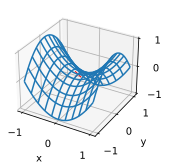

In [48]:
x, y = torch.meshgrid(torch.linspace(-1.0, 1.0, 101), torch.linspace(-1.0, 1.0, 101))
z = x**2 - y**2

ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10})
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y');

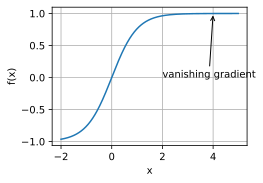

In [49]:
# vanishing gradients
x = torch.arange(-2.0, 5.0, 0.01)
d2l.plot(x, [torch.tanh(x)], 'x', 'f(x)')
annotate('vanishing gradient', (4, 1), (2, 0.0))

======================================Convexity=======================================

convex sets

![ConvexSetDef](./Images/ConvexSetDef.png)

![ConvexSetExample](./Images/ConvexSetExample.png)

![ConvexSetInterSection](./Images/ConvexSetInterSection.png)


Convex Function

![ConvexFunc](./Images/ConvexFunc.png)

In [50]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

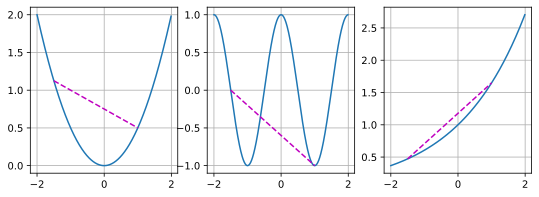

In [51]:
f = lambda x: 0.5 * x**2  # Convex
g = lambda x: torch.cos(np.pi * x)  # Nonconvex
h = lambda x: torch.exp(0.5 * x)  # Convex

x, segment = torch.arange(-2, 2, 0.01), torch.tensor([-1.5, 1])
d2l.use_svg_display()
_, axes = d2l.plt.subplots(1, 3, figsize=(9, 3))
for ax, func in zip(axes, [f, g, h]):
    d2l.plot([x, segment], [func(x), func(segment)], axes=ax)

Jensen’s Inequality:


f is a convex function, X is a random variable， $\alpha_i$ are nonnegative real numbers and $\sum_i \alpha_i = 1$, then we have
$\sum_i \alpha_i f(x_i) \ge f\left(\sum_i \alpha_i x_i\right)$
and
$\mathbb{E}_X[f(X)] \ge f\big(\mathbb{E}_X[X]\big)$

The expectation of a convex function is no less than the convex function of an expectation

![ConvexFunctionLocalMinimaIsGlobalMinima](./Images/ConvexFunctionLocalMinimaIsGlobalMinima.png)

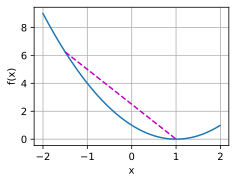

In [52]:
# For convex function,  the local minima of convex functions are also the global minima:

x, segment = torch.arange(-2, 2, 0.01), torch.tensor([-1.5, 1])

f = lambda x: (x - 1) ** 2
d2l.set_figsize()
d2l.plot([x, segment], [f(x), f(segment)], 'x', 'f(x)')

Hessian matrix of a scalar-valued function: $f : \mathbb{R}^n \to \mathbb{R}$


$
H(f)(\mathbf{x}) =
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} &
\frac{\partial^2 f}{\partial x_1 \partial x_2} &
\cdots &
\frac{\partial^2 f}{\partial x_1 \partial x_n} \\[6pt]
\frac{\partial^2 f}{\partial x_2 \partial x_1} &
\frac{\partial^2 f}{\partial x_2^2} &
\cdots &
\frac{\partial^2 f}{\partial x_2 \partial x_n} \\[6pt]
\vdots & \vdots & \ddots & \vdots \\[6pt]
\frac{\partial^2 f}{\partial x_n \partial x_1} &
\frac{\partial^2 f}{\partial x_n \partial x_2} &
\cdots &
\frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}.
$


 function: $f : \mathbb{R}^n \to \mathbb{R} \text{ is convex } \iff H(f)(\mathbf{x}) \succeq 0, \quad \forall \mathbf{x}.$

 A twice-differentiable function is convex if and only if its Hessian (a matrix of second derivatives) is positive semidefinite.


Convex constraints can be added via the Lagrangian. In practice we may simply add them with a penalty to the objective function.




# Lagrangian — Concise Summary

## 🔹 Core Idea
The **Lagrangian** simplifies constrained optimization by combining the objective and constraints into one function.

**Analogy:** A **ball** (solution) rolls inside a **box** (constraints).  
The walls push back (via multipliers) when the ball hits them — at equilibrium, forces balance.

---

## 🔹 Formulation

Original problem:
$$
\min_x f(x) \quad \text{s.t. } c_i(x) \le 0, \; i=1,...,n
$$

Lagrangian:
$$
L(x, \alpha) = f(x) + \sum_i \alpha_i c_i(x), \quad \alpha_i \ge 0
$$

We find $(x^*, \alpha^*)$ satisfying the **KKT conditions**:

$$
\begin{cases}
\nabla_x L(x, \alpha) = 0 & \text{(stationarity)} \\
c_i(x) \le 0 & \text{(primal feasibility)} \\
\alpha_i \ge 0 & \text{(dual feasibility)} \\
\alpha_i c_i(x) = 0 & \text{(complementary slackness)}
\end{cases}
$$

---

## 🔹 Active vs Inactive Constraints

| Type | Condition | Effect |
|------|------------|---------|
| **Active** | $c_i(x) = 0$ | Constraint directly affects solution |
| **Inactive** | $c_i(x) < 0$ | Constraint has no effect ($\alpha_i = 0$) |

**Example:**  
- $x \ge 0$, solution $x=0$ → active.  
- $x \ge 0$, solution $x=2$ → inactive.

---

## 🔹 Saddle Point Formulation

We look for a **saddle point**:
$$
\max_{\alpha \ge 0} \; \min_x L(x, \alpha)
$$
- Minimize w.r.t. $x$ → satisfy constraints.  
- Maximize w.r.t. $\alpha$ → enforce constraints.

At equilibrium, the objective and constraints balance.

---

## 🔹 Solving Step-by-Step

1. **Write Lagrangian:** $L(x, \alpha) = f(x) + \sum_i \alpha_i c_i(x)$  
2. **Stationarity:** $\nabla f(x) + \sum_i \alpha_i \nabla c_i(x) = 0$  
3. **Feasibility:** $c_i(x) \le 0$  
4. **Complementary Slackness:** $\alpha_i c_i(x) = 0$  
5. **Dual Feasibility:** $\alpha_i \ge 0$  
6. **Solve $(x, \alpha)$:** combine equations to find $(x^*, \alpha^*)$ minimizing $f(x)$.

---

## ✅ Summary

- The Lagrangian converts constraints into forces.  
- **Lagrange multipliers** act as pressure enforcing constraints.  
- The optimal $(x^*, \alpha^*)$ is a **saddle point** of $L(x, \alpha)$ —  
  minimum in $x$, maximum in $\alpha$.


## 🔹 “Projection”

Imagine you have a point **x** that’s *outside* some allowed region (a set **𝒳**).  
A **projection** finds the **closest point inside 𝒳** to **x**.

Mathematically:

$$
\text{Proj}_{\mathcal{X}}(x) = \arg\min_{x' \in \mathcal{X}} \|x - x'\|
$$

It means: “find the $x'$ that is inside $\mathcal{X}$ and is closest to $x$.”  
So projection = *“pulling x back to the legal region.”*

### 🔹 Example 1: Gradient Clipping
$$
\mathbf{g} \leftarrow \mathbf{g} \cdot \min(1, \frac{\theta}{\|\mathbf{g}\|})
$$

That’s *projecting the gradient vector* onto a ball of radius $\theta$.

- If the gradient is smaller than $\theta$ → unchanged.  
- If it’s larger → shrink it to lie **on the circle (or sphere)** of radius $\theta$.

That’s exactly a **projection onto an $\ell_2$ ball**.

---

### 🔹 Example 2: Circle and Diamond (Figure Explanation)
![Projection1](./Images/projection1.png)

In the figure, two shapes represent convex constraint sets:

- **Left (circle):** an $\ell_2$ ball.  
- **Right (diamond):** an $\ell_1$ ball.

**Yellow point:** already inside the allowed region → projection does nothing.  
**Black point:** outside → it’s moved (red arrow) to the **nearest point on the boundary** (red point).

Key idea:
- For the **circle ($\ell_2$)**, projection just scales the vector (keeps direction).  
- For the **diamond ($\ell_1$)**, projection may *change direction*, because the nearest point might lie along an edge, not directly along the same line.

## 🔹 Why This Matters

Projection is critical when:
1. You’re optimizing but need to **satisfy constraints** (e.g., “weight norm ≤ θ”).  
2. You want **sparse weights** — projecting onto an $\ell_1$ ball promotes sparsity.  
3. You’re applying **gradient clipping** to stabilize training.

So, every time an update moves you outside the valid region, projection *pulls you back in* — but in the **shortest possible way**.

## Understanding $\ell_1$ and $\ell_2$ Balls

### 🔹 Definition: $\ell_p$ Norm

For a vector $x = [x_1, x_2, \ldots, x_n]$, the **$\ell_p$ norm** is defined as:

$$
\|x\|_p = \left( \sum_{i=1}^{n} |x_i|^p \right)^{1/p}
$$

Two special cases are commonly used:

- **$\ell_1$ norm:**  
  $$\|x\|_1 = \sum_i |x_i|$$

- **$\ell_2$ norm:**  
  $$\|x\|_2 = \sqrt{ \sum_i x_i^2 }$$


### 🔹 What’s an $\ell_p$ Ball?

An **$\ell_p$ ball** of radius $r$ centered at the origin is the set of all vectors $x$ whose $\ell_p$ norm is less than or equal to $r$:

$$
B_p(r) = \{ x \in \mathbb{R}^n : \|x\|_p \le r \}
$$

This represents the region of all “allowed” vectors defined by the $p$-norm.

### 🔸 1. $\ell_2$ Ball → Circle (or Sphere)

- **Shape:** Perfect circle (2D) or sphere (3D).  
- **Equation:** $x_1^2 + x_2^2 \le r^2$  
- **Intuition:** All points within distance $r$ from the origin (using Euclidean distance).  
- **Effect in optimization:** Keeps vectors *smooth and dense*; used in L2 regularization.

In 2D, plotting $|x_1|$ vs $|x_2|$ gives a **circle**.

### 🔸 2. $\ell_1$ Ball → Diamond (or Octahedron)

- **Shape:** Diamond (2D) or multi-sided pyramid (higher dimensions).  
- **Equation:** $|x_1| + |x_2| \le r$  
- **Intuition:** All points whose absolute values sum to less than or equal to $r$.  
- **Effect in optimization:** Encourages *sparsity* (many coordinates become 0); used in L1 regularization (Lasso).

In 2D, it forms a **diamond** centered at the origin.

### 🔹 Why It Matters

- **$\ell_2$ (Ridge):** Shrinks weights smoothly → small but nonzero.
When the contours of the loss function (ellipses) touch this region, they almost never touch exactly at an axis — because the circle is round. ⇒ All weights get slightly reduced, but rarely to exactly zero.
- **$\ell_1$ (Lasso):** Drives some weights to zero → sparse representation.
When the loss contours expand and first touch the diamond, they’re most likely to touch at a corner. Each corner corresponds to some coordinate being exactly zero. ⇒ L1 prefers solutions with some weights = 0 (sparse).

=========================Gradient Descent==============================

![GD1](./Images/GD1.png)

In [53]:
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l

def f(x):  # Objective function
    return x ** 2

def f_grad(x):  # Gradient (derivative) of the objective function
    return 2 * x

In [54]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results

results = gd(0.2, f_grad)

epoch 10, x: 0.060466


In [55]:
results

[10.0,
 6.0,
 3.5999999999999996,
 2.1599999999999997,
 1.2959999999999998,
 0.7775999999999998,
 0.46655999999999986,
 0.2799359999999999,
 0.16796159999999993,
 0.10077695999999996,
 0.06046617599999997]

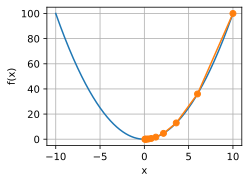

In [56]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results], [[f(x) for x in f_line], [f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])

show_trace(results, f)

epoch 10, x: 3.486784


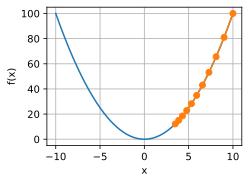

In [57]:
show_trace(gd(0.05, f_grad), f)

epoch 10, x: 61.917364


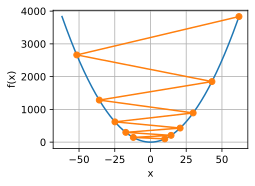

In [58]:
show_trace(gd(1.1, f_grad), f)

epoch 10, x: -1.528166


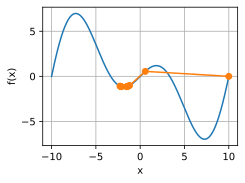

In [59]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # Objective function
    return x * torch.cos(c * x)

def f_grad(x):  # Gradient of the objective function
    return torch.cos(c * x) - c * x * torch.sin(c * x)

show_trace(gd(2, f_grad), f)

![GD2](./Images/GD2.png)

In [60]:
# Multivariate Gradient Descent

def train_2d(trainer, steps=20, f_grad=None):  #@save
    """Optimize a 2D objective function with a customized trainer."""
    # `s1` and `s2` are internal state variables that will be used in Momentum, adagrad, RMSProp
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results):  #@save
    """Show the trace of 2D variables during optimization."""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
                          torch.arange(-3.0, 1.0, 0.1), indexing='ij')
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

epoch 20, x1: -0.057646, x2: -0.000073


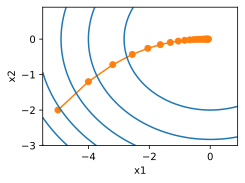

In [61]:
def f_2d(x1, x2):  # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):  # Gradient of the objective function
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

![Newton's methods](./Images/Newton'sMethods.png)


## Expanding above
### 🔹 1. Define the Function Relationship

We start with a scalar function:

$$
f : \mathbb{R}^d \to \mathbb{R}
$$

and define a new function in terms of a **small step** $\epsilon$:

$$
g(\epsilon) = f(x + \epsilon)
$$

Here:

- $x$ is **fixed** — the point we’re expanding around.  
- $\epsilon$ is the **variable** — a small displacement from $x$.

So $g(\epsilon)$ describes how $f$ changes as we move slightly away from $x$.

---

### 🔹 2. Differentiate with Respect to $\epsilon$

We compute:

$$
\frac{\partial f(x+\epsilon)}{\partial \epsilon}
$$

By the chain rule:

$$
\frac{\partial f(x+\epsilon)}{\partial \epsilon}
= \frac{\partial f(x+\epsilon)}{\partial (x+\epsilon)} \cdot \frac{\partial (x+\epsilon)}{\partial \epsilon}
$$

Since $\frac{\partial (x+\epsilon)}{\partial \epsilon} = I$ (the identity matrix), we have:

$$
\frac{\partial f(x+\epsilon)}{\partial \epsilon} = \nabla f(x+\epsilon)
$$

Thus, the derivative of $f(x+\epsilon)$ w.r.t. $\epsilon$ is simply the **gradient of $f$ evaluated at $x+\epsilon$**.

---

### 🔹 3. Why It Equals Zero at the Minimum

At a **local minimum** $x^*$ of $f$, the gradient vanishes:

$$
\nabla f(x^*) = 0
$$

When we expand around this point, i.e., set $x = x^*$, we get:

$$
\frac{\partial f(x+\epsilon)}{\partial \epsilon} \bigg|_{\epsilon = 0}
= \nabla f(x^*) = 0
$$

So — the derivative is zero **at the minimum**, not everywhere.

---

### 🔹 4. Distinguish Two Different “Zeros”

It’s easy to confuse two different cases:

| Expression | Meaning | Why Derivative = 0 |
|-------------|----------|------------------|
| $\frac{\partial f(x)}{\partial \epsilon}$ | Derivative of constant $f(x)$ term | $f(x)$ does not depend on $\epsilon$ |
| $\frac{\partial f(x+\epsilon)}{\partial \epsilon}\big|_{\epsilon=0}$ | Gradient at the expansion point | $\nabla f(x) = 0$ at a local minimum |

So:
- The first zero comes from a **constant term**.  
- The second zero comes from **the first-order optimality condition**.

---

### 🔹 5. Geometric Intuition

- $x$: fixed reference point — your current position.  
- $\epsilon$: the small move you’re testing.  
- $f(x)$: value of the function before moving (constant).  
- $f(x+\epsilon)$: value after moving.  

At the **minimum**, the slope (gradient) in *every direction* is zero.  
That’s why $\frac{\partial f(x+\epsilon)}{\partial \epsilon} = 0$ at $\epsilon = 0$.

---

### ✅ 6. Summary

| Concept | Meaning |
|----------|----------|
| $f(x)$ | Fixed value — constant when differentiating w.r.t. $\epsilon$ |
| $f(x+\epsilon)$ | Function of $\epsilon$ — describes how $f$ changes when we move |
| $\frac{\partial f(x+\epsilon)}{\partial \epsilon}$ | Gradient of $f$ evaluated at $x+\epsilon$ |
| At minimum ($\epsilon=0$) | $\nabla f(x)=0$, so derivative = 0 |

---

#### ✅ Final Key Idea

The derivative $\frac{\partial f(x+\epsilon)}{\partial \epsilon}$ is **not always zero**,  
but it **becomes zero exactly at the minimum**, because that’s where the gradient of $f$ vanishes.

epoch 10, x: tensor(0.)


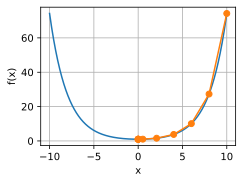

In [62]:
c = torch.tensor(0.5)

def f(x):  # Objective function
    return torch.cosh(c * x)

def f_grad(x):  # Gradient of the objective function
    return c * torch.sinh(c * x)

def f_hess(x):  # Hessian of the objective function
    return c**2 * torch.cosh(c * x)

def newton(eta=1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

show_trace(newton(), f)


## Is Newton’s Method Applicable for Nonconvex Functions?

### 🔹 1. Recap of Newton’s Method

Newton’s method for optimization updates the parameter $x$ as:

$$
x_{t+1} = x_t - H^{-1}(x_t) \, \nabla f(x_t)
$$

where:
- $\nabla f(x_t)$ is the **gradient**,
- $H(x_t) = \nabla^2 f(x_t)$ is the **Hessian matrix**.

The idea is to approximate $f(x)$ locally with a **second-order Taylor expansion** and move to the point that minimizes that quadratic approximation.

---

### 🔹 2. When $f(x)$ is Convex

If $f$ is **strictly convex**:

- The Hessian $H(x)$ is **positive definite** for all $x$.
- The local quadratic approximation is always **bowl-shaped**.
- The Newton step always moves toward the **global minimum**.
- Convergence is **fast** (often quadratic near the optimum).

✅ **In this case, Newton’s method is guaranteed to converge to the unique global minimum.**

---

### 🔹 3. When $f(x)$ is Nonconvex

For **nonconvex** functions, the story changes.

#### (a) The Hessian may not be positive definite
- $H(x)$ can have **negative eigenvalues**, meaning the local quadratic surface is not a pure bowl — it may be a **saddle** or **ridge**.
- The Newton step $-H^{-1}\nabla f(x)$ may **not point toward a minimum**.

Hence, Newton’s method might:
- Converge to a **saddle point**,
- Converge to a **local maximum**, or
- **Diverge** completely.

So yes, you *can* apply Newton’s method to nonconvex functions, but it’s **not guaranteed** to find a minimum.

---

### 🔹 4. Example: $f(x) = x^3$

$$
\nabla f = 3x^2, \quad H = 6x
$$

Newton’s step:

$$
x_{t+1} = x_t - \frac{3x_t^2}{6x_t} = \frac{x_t}{2}
$$

The method converges to $x=0$, which is a **saddle point**, not a minimum.  
Thus, Newton’s method **cannot distinguish** between minima, maxima, and saddles.

---

### 🔹 5. Practical Fixes for Nonconvex Functions

To handle nonconvexity safely, several modifications are used:

| Variant | Key Idea | Effect |
|----------|-----------|--------|
| **Damped / Levenberg–Marquardt Newton** | Add damping: $(H + \lambda I)^{-1}$ | Stabilizes updates when $H$ not positive definite |
| **Trust Region Methods** | Restrict step size using a local subproblem | Prevents overshooting in nonconvex regions |
| **Modified Newton** | Replace $H$ with a positive-definite approximation | Ensures descent direction |
| **Quasi-Newton (e.g., BFGS)** | Build a Hessian approximation guaranteed to be positive-definite | Works even for mildly nonconvex $f$ |

---

### 🔹 6. Comparison Summary

| Property | Convex Function | Nonconvex Function |
|-----------|----------------|--------------------|
| Hessian | Positive definite | May be indefinite (negative eigenvalues) |
| Step direction | Always descent | Can be ascent or unstable |
| Convergence | Global (well-conditioned) | May hit saddle, local max, or diverge |
| Modifications needed | None | Often requires damping or quasi-Newton variants |

---

### ✅ 7. Bottom Line

- **Yes**, Newton’s method *can* be applied to nonconvex functions.  
- **But**, without modification, it’s **not guaranteed** to find a local or global minimum — it can get stuck at a **saddle point** or even **diverge**.  
- In real-world optimization (e.g., neural networks), **modified Newton methods** like **BFGS**, **L-BFGS**, or **trust-region Newton** are used to handle nonconvex landscapes safely.

---

#### 🧠 Key Takeaway

Newton’s method always tries to find a **stationary point** where:

$$
\nabla f(x) = 0
$$

But in nonconvex problems, that stationary point might not be a minimum — it could just as easily be a **maximum** or **saddle**.  
That’s why modern optimizers modify or approximate Newton’s step to guarantee **descent** instead of pure stationarity.


Now let’s consider a nonconvex function, such as $f(x) = x \cos(cx)$ for some constant $c$. After all, note that in Newton’s method we end up dividing by the Hessian. This means that if the second derivative is negative we may walk into the direction of increasing the value of $f$. That is a fatal flaw of the algorithm. Let’s see what happens in practice.

epoch 10, x: tensor(26.8341)


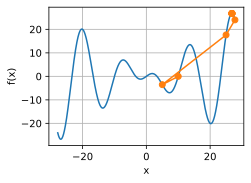

In [63]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # Objective function
    return x * torch.cos(c * x)

def f_grad(x):  # Gradient of the objective function
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):  # Hessian of the objective function
    return - 2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)

show_trace(newton(), f)

Above went spectacularly wrong. How can we fix it? One way would be to “fix” the Hessian by taking its absolute value instead. Another strategy is to bring back the learning rate. This seems to defeat the purpose, but not quite. Having second-order information allows us to be cautious whenever the curvature is large and to take longer steps whenever the objective function is flatter. Let’s see how this works with a slightly smaller learning rate, say $\eta = 0.5$. As we can see, we have quite an efficient algorithm.

epoch 10, x: tensor(7.2699)


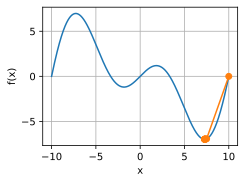

In [64]:
show_trace(newton(0.5), f)

![Newton's methods convergence](./Images/Newton'sMethodsConvergence.png)

====================Stochastic Gradient Descent=========================

![Stochastic Gradient Update](./Images/SGD1.png)

In [65]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

epoch 50, x1: 0.038645, x2: 0.075120


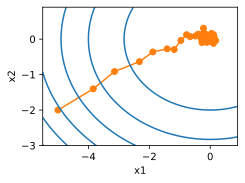

In [66]:
# compare it with gradient descent by adding random noise with a mean of 0 and a variance of 1 to the gradient to simulate a stochastic gradient descent.

def f(x1, x2):  # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):  # Gradient of the objective function
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # Simulate noisy gradient
    g1 += torch.normal(0.0, 1, (1,)).item()
    g2 += torch.normal(0.0, 1, (1,)).item()
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr  # Constant learning rate
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

Stochastic gradient descent is much more noise, we need to reduce the learning rate dynamically as optimization progresses.

$$
\begin{aligned}
\eta(t) &= \eta_i \quad &&\text{if } t_i \le t \le t_{i+1} &&\text{piecewise constant} \\
\eta(t) &= \eta_0 \cdot e^{-\lambda t} \quad &&\text{exponential decay} \\
\eta(t) &= \eta_0 \cdot (\beta t + 1)^{-\alpha} \quad &&\text{polynomial decay}
\end{aligned}
$$

In the first piecewise constant scenario we decrease the learning rate, e.g., whenever progress in optimization stalls. This is a common strategy for training deep networks. Alternatively we could decrease it much more aggressively by an exponential decay. Unfortunately this often leads to premature stopping before the algorithm has converged. A popular choice is polynomial decay with $\alpha = 0.5$. In the case of convex optimization there are a number of proofs that show that this rate is well behaved.


learning rate: 0.818731
learning rate: 0.740818
learning rate: 0.670320
learning rate: 0.606531
learning rate: 0.548812
learning rate: 0.496585
learning rate: 0.449329
learning rate: 0.406570
learning rate: 0.367879
learning rate: 0.332871
learning rate: 0.301194
learning rate: 0.272532
learning rate: 0.246597
learning rate: 0.223130
learning rate: 0.201897
learning rate: 0.182684
learning rate: 0.165299
learning rate: 0.149569
learning rate: 0.135335
learning rate: 0.122456
learning rate: 0.110803
learning rate: 0.100259
learning rate: 0.090718
learning rate: 0.082085
learning rate: 0.074274
learning rate: 0.067206
learning rate: 0.060810
learning rate: 0.055023
learning rate: 0.049787
learning rate: 0.045049
learning rate: 0.040762
learning rate: 0.036883
learning rate: 0.033373
learning rate: 0.030197
learning rate: 0.027324
learning rate: 0.024724
learning rate: 0.022371
learning rate: 0.020242
learning rate: 0.018316
learning rate: 0.016573
learning rate: 0.014996
learning rate: 0

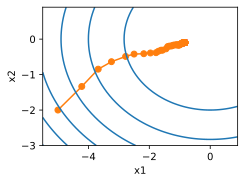

In [67]:
# Exponentially decaying learning rate

def exponential_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    ret = math.exp(-0.1 * t)
    print(f'learning rate: {ret:f}')
    return ret

t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

# As expected, the variance in the parameters is significantly reduced. However, this comes at the expense of failing to converge to the optimal solution.
# Even after 1000 iteration steps are we are still very far away from the optimal solution. Indeed, the algorithm fails to converge at all. On the other hand, 
# if we use a polynomial decay where the learning rate decays with the inverse square root of the number of steps, convergence gets better after only 50 steps.

learning rate: 0.912871
learning rate: 0.877058
learning rate: 0.845154
learning rate: 0.816497
learning rate: 0.790569
learning rate: 0.766965
learning rate: 0.745356
learning rate: 0.725476
learning rate: 0.707107
learning rate: 0.690066
learning rate: 0.674200
learning rate: 0.659380
learning rate: 0.645497
learning rate: 0.632456
learning rate: 0.620174
learning rate: 0.608581
learning rate: 0.597614
learning rate: 0.587220
learning rate: 0.577350
learning rate: 0.567962
learning rate: 0.559017
learning rate: 0.550482
learning rate: 0.542326
learning rate: 0.534522
learning rate: 0.527046
learning rate: 0.519875
learning rate: 0.512989
learning rate: 0.506370
learning rate: 0.500000
learning rate: 0.493865
learning rate: 0.487950
learning rate: 0.482243
learning rate: 0.476731
learning rate: 0.471405
learning rate: 0.466252
learning rate: 0.461266
learning rate: 0.456435
learning rate: 0.451754
learning rate: 0.447214
learning rate: 0.442807
learning rate: 0.438529
learning rate: 0

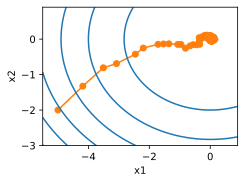

In [68]:
def polynomial_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    ret = (1 + 0.1 * t) ** (-0.5)
    print(f'learning rate: {ret:f}')
    return ret

t = 1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

===========================Minibatch Stochastic Gradient Descent================================

In [69]:
%matplotlib inline
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

A = torch.zeros(256, 256)
B = torch.randn(256, 256)
C = torch.randn(256, 256)

In [70]:
class Timer:  #@save
    """Record multiple running times."""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """Start the timer."""
        self.tik = time.time()

    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """Return the average time."""
        return sum(self.times) / len(self.times)

    def sum(self):
        """Return the sum of time."""
        return sum(self.times)

    def cumsum(self):
        """Return the accumulated time."""
        return np.array(self.times).cumsum().tolist()

timer = Timer()

In [71]:
# Compute A = BC one element at a time
timer.start()
for i in range(256):
    for j in range(256):
        A[i, j] = torch.dot(B[i, :], C[:, j])
timer.stop()

1.22550630569458

In [72]:
# Compute A = BC one column at a time
timer.start()
for j in range(256):
    A[:, j] = torch.mv(B, C[:, j])
timer.stop()

0.015050649642944336

In [73]:
# Compute A = BC in one go
timer.start()
A = torch.mm(B, C)
timer.stop()

#  multiplying two 256x256 matrices takes 0.03(2*256*256*256) billion floating point operations.
gigaflops = [0.03 / i for i in timer.times]
print(f'performance in Gigaflops: element {gigaflops[0]:.3f}, '
      f'column {gigaflops[1]:.3f}, full {gigaflops[2]:.3f}')

performance in Gigaflops: element 0.024, column 1.993, full 2.846


In [74]:
timer.start()
for j in range(0, 256, 64):
    A[:, j:j+64] = torch.mm(B, C[:, j:j+64])
timer.stop()
print(f'performance in Gigaflops: block {0.03 / timer.times[3]:.3f}')

ZeroDivisionError: float division by zero

In [ ]:
#@save
d2l.DATA_HUB['airfoil'] = (d2l.DATA_URL + 'airfoil_self_noise.dat', '76e5be1548fd8222e5074cf0faae75edff8cf93f')

#@save
def get_data_ch11(batch_size=10, n=1500):
    data = np.genfromtxt(d2l.download('airfoil'), dtype=np.float32, delimiter='\t')
    data = torch.from_numpy((data - data.mean(axis=0)) / data.std(axis=0))
    data_iter = d2l.load_array((data[:n, :-1], data[:n, -1]),batch_size, is_train=True)
    return data_iter, data.shape[1]-1

In [ ]:
def sgd(params, states, hyperparams):
    for p in params:
        p.data.sub_(hyperparams['lr'] * p.grad)
        p.grad.data.zero_()

In [ ]:
#@save
def train_ch11(trainer_fn, states, hyperparams, data_iter, feature_dim, num_epochs=2):
    # Initialization
    w = torch.normal(mean=0.0, std=0.01, size=(feature_dim, 1), requires_grad=True)
    b = torch.zeros((1), requires_grad=True)
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    # Train
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[0, num_epochs], ylim=[0.22, 0.35])
    n, timer = 0, d2l.Timer()
    for _ in range(num_epochs):
        for X, y in data_iter:
            l = loss(net(X), y).mean()
            l.backward()
            trainer_fn([w, b], states, hyperparams)
            n += X.shape[0]
            if n % 200 == 0:
                timer.stop()
                animator.add(n/X.shape[0]/len(data_iter),(d2l.evaluate_loss(net, data_iter, loss),))
                timer.start()
    print(f'loss: {animator.Y[0][-1]:.3f}, {timer.sum()/num_epochs:.3f} sec/epoch')
    return timer.cumsum(), animator.Y[0]

loss: 0.251, 0.016 sec/epoch


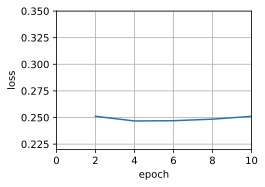

In [ ]:
def train_sgd(lr, batch_size, num_epochs=2):
    data_iter, feature_dim = get_data_ch11(batch_size)
    return train_ch11(sgd, None, {'lr': lr}, data_iter, feature_dim, num_epochs)

#  batch gradient descent. Setting the minibatch size to 1500
gd_res = train_sgd(lr=1, batch_size=1500, num_epochs=10)

loss: 0.246, 0.379 sec/epoch


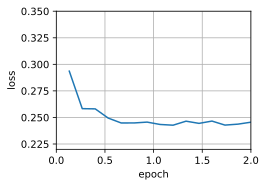

In [ ]:

# When the batch size equals 1, we use stochastic gradient descent for optimization.
# Although both the procedures processed 1500 examples within one epoch, stochastic gradient descent consumes more time than gradient descent in our experiment.
sgd_res = train_sgd(lr=0.005, batch_size=1, num_epochs=2)

loss: 0.247, 0.014 sec/epoch


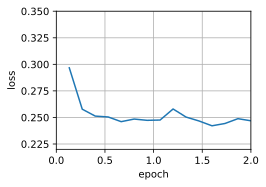

In [ ]:
# when the batch size equals 100, we use minibatch stochastic gradient descent for optimization. The time required per epoch is shorter than the time needed for stochastic gradient descent and the time for batch gradient descent.
mini1_res = train_sgd(lr=0.4, batch_size=100)

loss: 0.250, 0.051 sec/epoch


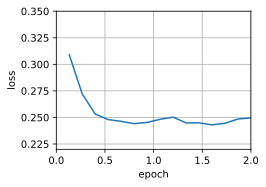

In [ ]:
mini2_res = train_sgd(lr=0.05, batch_size=10)

In [ ]:
gd_res # (time_array, loss_array)

([0.07674336433410645,
  0.1016533374786377,
  0.11908149719238281,
  0.13956713676452637,
  0.1577467918395996],
 [0.25113413492838543,
  0.24675533040364583,
  0.2469825439453125,
  0.24844989013671875,
  0.2510922037760417])

In [ ]:
sgd_res

([0.05020880699157715,
  0.09992504119873047,
  0.15204167366027832,
  0.2024836540222168,
  0.25485920906066895,
  0.31214380264282227,
  0.3593754768371582,
  0.4109013080596924,
  0.46092748641967773,
  0.5164973735809326,
  0.5687596797943115,
  0.616919755935669,
  0.6665072441101074,
  0.7145133018493652,
  0.7585992813110352],
 [0.2935777571212341,
  0.25828639395392916,
  0.25807540151975883,
  0.24939464811618034,
  0.24480945824308184,
  0.24482949934791862,
  0.24561815376406987,
  0.243398625446495,
  0.24271188969202334,
  0.24649409333315114,
  0.24442523184666037,
  0.24658026052547735,
  0.24280650904477594,
  0.24369604636826445,
  0.24553200301334815])

In [ ]:
map(list, zip(gd_res, sgd_res, mini1_res, mini2_res))

In [ ]:

list(map(list, zip(gd_res, sgd_res, mini1_res, mini2_res)))

# Each algorithm returns: (time_array, loss_array)
# gd_res =    (times_gd, losses_gd),       length of the array: 5: #epoches / 2
# sgd_res =   (times_sgd, losses_sgd),     length of the array: 15: #epoches *1500 / 200
# mini1_res = (times_mini1, losses_mini1), length of the array: 15: #epoches *1500 / 200
# mini2_res = (times_mini2, losses_mini2), length of the array: 15: #epoches *1500 / 200

# zip(...) → Groups corresponding elements from each result
#    (times_gd, times_sgd, times_mini1, times_mini2), (losses_gd, losses_sgd, losses_mini1, losses_mini2)
# map(list, ...) → Converts the grouped tuples into lists
#    [times_gd, times_sgd, times_mini1, times_mini2],    # All x-axis data
#    [losses_gd, losses_sgd, losses_mini1, losses_mini2]   # All y-axis data
# list(...) → Creates the final structure
#    [ [times_gd, times_sgd, times_mini1, times_mini2],    # All x-axis data
#      [losses_gd, losses_sgd, losses_mini1, losses_mini2]  # All y-axis data
#    ]

[[[0.07674336433410645,
   0.1016533374786377,
   0.11908149719238281,
   0.13956713676452637,
   0.1577467918395996],
  [0.05020880699157715,
   0.09992504119873047,
   0.15204167366027832,
   0.2024836540222168,
   0.25485920906066895,
   0.31214380264282227,
   0.3593754768371582,
   0.4109013080596924,
   0.46092748641967773,
   0.5164973735809326,
   0.5687596797943115,
   0.616919755935669,
   0.6665072441101074,
   0.7145133018493652,
   0.7585992813110352],
  [0.0025069713592529297,
   0.0025069713592529297,
   0.007529258728027344,
   0.012661457061767578,
   0.012661457061767578,
   0.012661457061767578,
   0.017721891403198242,
   0.017721891403198242,
   0.017721891403198242,
   0.02274489402770996,
   0.02274489402770996,
   0.027890920639038086,
   0.027890920639038086,
   0.027890920639038086,
   0.027890920639038086],
  [0.006005048751831055,
   0.013235330581665039,
   0.01832127571105957,
   0.02651691436767578,
   0.03171062469482422,
   0.03878140449523926,
   0.043

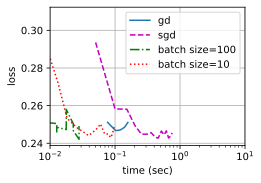

In [ ]:
# Now we can compare the time vs. loss for the previous four experiments.

d2l.set_figsize([6, 3])
d2l.plot(*list(map(list, zip(gd_res, sgd_res, mini1_res, mini2_res))),
         'time (sec)', 'loss', xlim=[1e-2, 10],
         legend=['gd', 'sgd', 'batch size=100', 'batch size=10'])
d2l.plt.gca().set_xscale('log')

In [ ]:
# Concise Implementation

#@save
def train_concise_ch11(trainer_fn, hyperparams, data_iter, num_epochs=4):
    # Initialization
    net = nn.Sequential(nn.Linear(5, 1))
    def init_weights(module):
        if type(module) == nn.Linear:
            torch.nn.init.normal_(module.weight, std=0.01)
    net.apply(init_weights)

    optimizer = trainer_fn(net.parameters(), **hyperparams)
    loss = nn.MSELoss(reduction='none')
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[0, num_epochs], ylim=[0.22, 0.35])
    n, timer = 0, d2l.Timer()
    for _ in range(num_epochs):
        for X, y in data_iter:
            optimizer.zero_grad()
            out = net(X)
            y = y.reshape(out.shape)
            l = loss(out, y)
            l.mean().backward()
            optimizer.step()
            n += X.shape[0]
            if n % 200 == 0:
                timer.stop()
                # `MSELoss` computes squared error without the 1/2 factor
                animator.add(n/X.shape[0]/len(data_iter),(d2l.evaluate_loss(net, data_iter, loss) / 2,))
                timer.start()
    print(f'loss: {animator.Y[0][-1]:.3f}, {timer.sum()/num_epochs:.3f} sec/epoch')

loss: 0.243, 0.055 sec/epoch


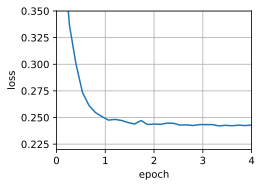

In [ ]:
data_iter, _ = get_data_ch11(10)
trainer = torch.optim.SGD
train_concise_ch11(trainer, {'lr': 0.01}, data_iter)

=========================Momentum============================

epoch 20, x1: -0.943467, x2: -0.000073


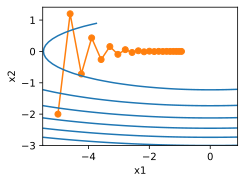

In [ ]:

%matplotlib inline
import torch
from d2l import torch as d2l

eta = 0.4
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

# This function is very flat in the direction of x1.
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1: -0.387814, x2: -1673.365109


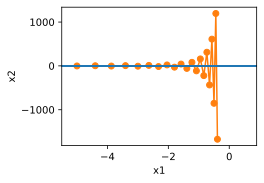

In [ ]:
# the gradient in the x2 direction is much higher and changes much more rapidly than in the horizontal x1 direction. 
# Thus we are stuck between two undesirable choices: if we pick a small learning rate we ensure that the solution does not diverge in 
# the x2 direction but we are saddled with slow convergence in the x1 direction. 
# Conversely, with a large learning rate we progress rapidly in the x1 direction but diverge in the x2 direction.

#  after a slight increase in learning rate from 0.4 to 0.6. Convergence in the x1 direction improves but the overall solution
# quality is much worse.
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

##### The Momentum Method

The momentum method allows us to solve the gradient descent problem described above.
Looking at the optimization trace above, we might intuit that averaging gradients over the past would work well. After all, in the $x_1$ direction this will aggregate well-aligned gradients, thus increasing the distance we cover with every step.
Conversely, in the $x_2$ direction where gradients oscillate, an aggregate gradient will reduce step size due to oscillations that cancel each other out.

Using $\mathbf{v}_t$ instead of the gradient $\mathbf{g}_t$ yields the following update equations:
$$
\mathbf{v}_t \leftarrow \beta \mathbf{v}_{t-1} + \mathbf{g}_{t,t-1}, \\
\mathbf{x}_t \leftarrow \mathbf{x}_{t-1} - \eta_t \mathbf{v}_t
$$

Note that for $\beta=0$ we recover regular gradient descent.

epoch 20, x1: 0.007188, x2: 0.002553



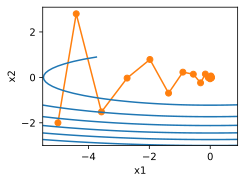

In [ ]:
# even with the same learning rate that we used before, momentum still converges well.

def momentum_2d(x1, x2, v1, v2):
    v1 = beta * v1 + 0.2 * x1
    v2 = beta * v2 + 4 * x2
    return x1 - eta * v1, x2 - eta * v2, v1, v2

eta, beta = 0.6, 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

epoch 20, x1: -0.126340, x2: -0.186632


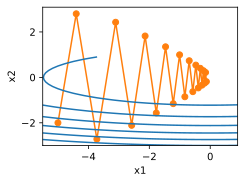

In [ ]:
# Halving it to 0.25 leads to a trajectory that barely converges at all. Nonetheless, it is a lot better than without momentum (when the solution diverges).

eta, beta = 0.6, 0.25
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

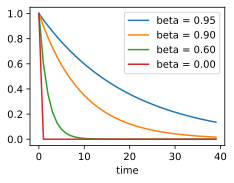

In [ ]:
d2l.set_figsize()
betas = [0.95, 0.9, 0.6, 0]
for beta in betas:
    x = torch.arange(40).detach().numpy()
    d2l.plt.plot(x, beta ** x, label=f'beta = {beta:.2f}')
d2l.plt.xlabel('time')
d2l.plt.legend();


### The Effective Step Size Becomes $\frac{\eta}{1 - \beta}$

momentum update rule in gradient descent, which defines the **velocity term** as:

$$
\mathbf{v}_t = \sum_{\tau=0}^{t-1} \beta^{\tau} \mathbf{g}_{t-\tau-1}
$$

In the limit (as $t \to \infty$), the geometric series of weights sums to:

$$
\sum_{\tau=0}^{\infty} \beta^{\tau} = \frac{1}{1 - \beta}
$$

This means that, over time, the **momentum term** effectively accumulates about $\frac{1}{1 - \beta}$ gradients’ worth of influence.

#### 1️⃣ Velocity Update with Momentum
The velocity term smooths gradients by exponential averaging:

$$
\mathbf{v}_t = \beta \mathbf{v}_{t-1} + \mathbf{g}_t
$$

Expanding this recursively gives:

$$
\mathbf{v}_t =\sum_{\tau=0}^{t-1} \beta^{\tau} \mathbf{g}_{t-\tau}
$$

When gradients are roughly stable (in steady state), $\mathbf{g}_t \approx \mathbf{g}$, so:

$$
\mathbf{v}_t \approx \mathbf{g} \sum_{\tau=0}^{\infty} \beta^{\tau}
$$

Substitute the infinite geometric sum:

$$
\sum_{\tau=0}^{\infty} \beta^{\tau} = \frac{1}{1 - \beta}
$$

Hence:

$$
\mathbf{v}_t \approx \frac{\mathbf{g}}{1 - \beta}
$$

#### 2️⃣ Parameter Update Rule

The standard update rule with momentum is:

$$
\mathbf{x}_{t+1} = \mathbf{x}_t - \eta \mathbf{v}_t
$$

Substituting the steady-state form of $\mathbf{v}_t$ gives:

$$
\mathbf{x}_{t+1} \approx \mathbf{x}_t - \frac{\eta}{1 - \beta} \mathbf{g}_t
$$

Thus, the **effective step size** behaves as if it were:

$$
\boxed{\eta_{\text{eff}} = \frac{\eta}{1 - \beta}}
$$

---

### 🔹 Intuition and Effect

| Parameter | $\beta$ | $\frac{1}{1 - \beta}$ | Effect on Step Size |
|------------|-----------|-------------------------|---------------------|
| No momentum | 0.0 | 1 | Normal step |
| Typical momentum | 0.9 | 10 | Step ≈ 10× larger |
| High momentum | 0.99 | 100 | Step ≈ 100× larger |

Momentum provides **two benefits**:
1. It **smooths** noisy gradient directions (averaging effect).  
2. It **amplifies** the effective step size by $\frac{1}{1 - \beta}$, leading to faster convergence in well-behaved regions.

Hence, the method effectively takes **larger, smoother steps** in the direction of the average gradient.

In [ ]:
# Implementation from Scratch

def init_momentum_states(feature_dim):
    v_w = torch.zeros((feature_dim, 1))
    v_b = torch.zeros(1)
    return (v_w, v_b)

def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        with torch.no_grad():
            v[:] = hyperparams['momentum'] * v + p.grad
            p[:] -= hyperparams['lr'] * v
        p.grad.data.zero_()

def train_momentum(lr, momentum, num_epochs=2):
    d2l.train_ch11(sgd_momentum, init_momentum_states(feature_dim),![![]sswwwqq]
                   {'lr': lr, 'momentum': momentum}, data_iter,
                   feature_dim, num_epochs)

data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
train_momentum(0.02, 0.5)

SyntaxError: invalid syntax (1991709682.py, line 16)

loss: 0.245, 0.068 sec/epoch


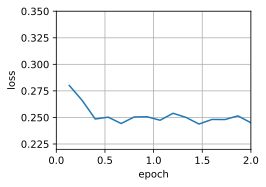

In [ ]:
train_momentum(0.01, 0.9)

loss: 0.244, 0.062 sec/epoch


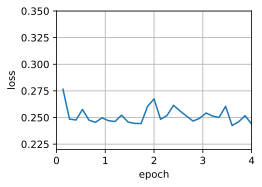

In [ ]:
# Concise Implementation

trainer = torch.optim.SGD
d2l.train_concise_ch11(trainer, {'lr': 0.005, 'momentum': 0.9}, data_iter)

### Positive Definite Matrix

A **positive definite matrix** $A$ is a real symmetric (or complex Hermitian) matrix that satisfies: $x^\top A x > 0$ for all nonzero vectors $x \in \mathbb{R}^n$

Intuitively: It means $A$ always produces a positive scalar when you "sandwich" it between any nonzero vector $x$. It's the matrix analogue of a positive scalar number. In geometry, it ensures the quadratic form
$x^\top A x$ defines a **"bowl-shaped" (strictly convex) surface**.

#### 🔹 Why Must It Be Symmetric?

The symmetry requirement isn't just a convention --- it's **mathematically necessary** for the condition $x^\top A x > 0$ to behave consistently.

##### 1. The quadratic form must yield real numbers

For $x^\top A x$ to be real for *all* $x$,
the matrix must be **symmetric**:

$(x^\top A x)^\top = x^\top A^\top x = x^\top A x \implies A^\top = A$

If $A$ weren't symmetric, $x^\top A x$ could
be **complex or inconsistent**, which breaks the idea of comparing it to
"\> 0".

##### 2. Eigenvalue behavior

-   For symmetric matrices, all **eigenvalues are real**, and they determine definiteness:

    $A \text{ is positive definite } \iff \text{all eigenvalues } \lambda_i > 0$

-   For **non-symmetric matrices**, eigenvalues can be complex --- and "\> 0" is meaningless for complex numbers.

So symmetry guarantees you can reason about "positivity" via eigenvalues.

##### 3. Geometric consistency

A symmetric positive definite matrix defines: A **convex quadratic function** $f(x) = \tfrac{1}{2}x^\top A x$ - An **elliptical** contour (not skewed or twisted)

If $A$ weren't symmetric, you'd get **tilted, possibly saddle-shaped** surfaces, which lose the clean geometric meaning.


### Matrix Decompositions — Comprehensive Summary

#### 1. Symmetric / Hermitian Matrices

| **Matrix Type** | **Condition** | **Decomposition** | **Properties** |
|------------------|---------------|--------------------|----------------|
| Symmetric | $ \mathbf{A} = \mathbf{A}^\top $ | $ \mathbf{A} = \mathbf{U} \boldsymbol{\Lambda} \mathbf{U}^\top $ | $ \mathbf{U} $ orthogonal, $ \boldsymbol{\Lambda} $ diagonal with real eigenvalues |
| Hermitian | $ \mathbf{A} = \mathbf{A}^* $ | $ \mathbf{A} = \mathbf{U} \boldsymbol{\Lambda} \mathbf{U}^\dagger $ | $ \mathbf{U} $ unitary, real eigenvalues |

---

#### 2. Symmetric Positive (Semi)-Definite Matrices

| **Matrix Type** | **Condition** | **Decomposition** | **Notes** |
|------------------|---------------|--------------------|------------|
| SPD (Positive Definite) | $ \mathbf{A} = \mathbf{A}^\top, \ \lambda_i > 0 $ | $ \mathbf{A} = \mathbf{U} \boldsymbol{\Lambda} \mathbf{U}^\top $ | All eigenvalues $ > 0 $ |
|  |  | $ \mathbf{A} = \mathbf{L} \mathbf{L}^\top $ | Cholesky decomposition, $ \mathbf{L} $ lower triangular |
| PSD (Semidefinite) | $ \mathbf{A} = \mathbf{A}^\top, \ \lambda_i \ge 0 $ | $ \mathbf{A} = \mathbf{U} \boldsymbol{\Lambda} \mathbf{U}^\top $ | Some eigenvalues may be zero |

---

#### 3. Orthogonal / Unitary Matrices

| **Matrix Type** | **Condition** | **Decomposition** | **Properties** |
|------------------|---------------|--------------------|----------------|
| Orthogonal | $ \mathbf{Q}^\top \mathbf{Q} = \mathbf{I} $ | $ \mathbf{Q} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^\top $ ($ \boldsymbol{\Sigma} = \mathbf{I} $, the diagonal scaling becomes the identity matrix, meaning they don’t stretch vectors, they only rotate or reflect them) | Preserves lengths and angles; All eigenvalues have absolute value 1, so every eigenvalue lies on the unit circle in the complex plane. |
| Unitary | $ \mathbf{Q}^\dagger \mathbf{Q} = \mathbf{I} $ | $ \mathbf{Q} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^\dagger $ | Complex analog of orthogonal matrices |

Proof $\boldsymbol{\Sigma} = \mathbf{I}$:
For any matrix $\mathbf{Q}$: $\mathbf{Q} = \mathbf{U} \Sigma \mathbf{V}^T$ where $\mathbf{U}$ and $\mathbf{V}$ are orthogonal matrices: $\mathbf{U}^T U = \mathbf{I}$, $\mathbf{Q}^T \mathbf{Q} = \mathbf{I}$.
So, $\mathbf{Q}^T \mathbf{Q} = \mathbf{V} \Sigma^2 \mathbf{V}^T$ = $\mathbf{I}$.
Multiply both sides by $\mathbf{V}^T$ (on the left) and $\mathbf{V}$ (on the right), we have $\Sigma^2 = \mathbf{I}$, and since $\Sigma$ is diagonal and contains non-negative singular values, $\Sigma = \mathbf{I}$

---

#### 4. General Square Matrices

| **Matrix Type** | **Condition** | **Decomposition** | **Notes** |
|------------------|---------------|--------------------|------------|
| Any diagonalizable matrix | A is diagonalizable ⟺ the sum of dimensions of all eigenspaces=n ⟺ A has n linearly independent eigenvectors  ⟺ We can represent A in a basis of its eigenvectors| $ \mathbf{A} = \mathbf{V} \boldsymbol{\Lambda} \mathbf{V}^{-1} $ | Eigen decomposition; Diagonalization means you can find a coordinate system (basis) where A acts by simple scaling along each axis — no mixing between directions |
| Defective (non-diagonalizable) | otherwise | $ \mathbf{A} = \mathbf{V} \mathbf{J} \mathbf{V}^{-1} $ | Jordan decomposition |
| Normal | $ \mathbf{A}^\top \mathbf{A} = \mathbf{A} \mathbf{A}^\top $ | $ \mathbf{A} = \mathbf{U} \boldsymbol{\Lambda} \mathbf{U}^\top $ | Includes symmetric, orthogonal, unitary, skew-symmetric matrices |

---

#### 5. Rectangular Matrices

| **Matrix Type** | **Condition** | **Decomposition** | **Purpose / Use** |
|------------------|---------------|--------------------|--------------------|
| Any $ m \times n $ matrix | None | $ \mathbf{A} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^\top $ | Singular Value Decomposition (SVD) |
|  | None | $ \mathbf{A} = \mathbf{Q} \mathbf{R} $ | QR decomposition = orthogonalization of the column space of A. Q: orthonormal basis for the column space - orthonormal matrix, R: coordinates (weights) describing each original column as a linear combination of those basis vectors - upper triangular matrix. It's what the Gram–Schmidt process formalizes. |
|  | All its leading principal minors are nonzero | $ \mathbf{A} = \mathbf{L} \mathbf{U} $ | LU decomposition (if square and non-singular) |

---

#### 6. Special Structured Matrices

| **Matrix Type** | **Condition** | **Decomposition** | **Notes** |
|------------------|---------------|--------------------|------------|
| Skew-symmetric | $ \mathbf{A} = -\mathbf{A}^\top $ | $ \mathbf{A} = \mathbf{Q} \mathbf{J} \mathbf{Q}^\top $ | $ \mathbf{J} $ block-diagonal with $ 2 \times 2 $ rotation blocks |
| Idempotent | $ \mathbf{A}^2 = \mathbf{A} $ | $ \mathbf{A} = \mathbf{U} \begin{bmatrix} \mathbf{I}_r & 0 \\ 0 & 0 \end{bmatrix} \mathbf{U}^\top $ | Eigenvalues are $ 0 $ or $ 1 $ |
| Projection | $ \mathbf{P}^2 = \mathbf{P},\ \mathbf{P}^\top = \mathbf{P} $ | $ \mathbf{P} = \mathbf{U} \begin{bmatrix} \mathbf{I}_r & 0 \\ 0 & 0 \end{bmatrix} \mathbf{U}^\top $ | Orthogonal projection matrix |
| Stochastic | Rows sum to $ 1 $ | — (Perron–Frobenius theorem) | Dominant eigenvalue $ = 1 $, eigenvector $ \ge 0 $ |

---

#### 7. Summary by Decomposition Type

| **Decomposition** | **Applies To** | **Form** |
|--------------------|----------------|-----------|
| Eigendecomposition | Diagonalizable matrices | $ \mathbf{A} = \mathbf{U} \boldsymbol{\Lambda} \mathbf{U}^{-1} $ |
| Spectral (Orthogonal) | Symmetric / Hermitian | $ \mathbf{A} = \mathbf{U} \boldsymbol{\Lambda} \mathbf{U}^\top $ |
| SVD | Any $ m \times n $ | $ \mathbf{A} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^\top $ |
| Cholesky | SPD matrices | $ \mathbf{A} = \mathbf{L} \mathbf{L}^\top $ |
| QR | Any full-rank $ m \times n $ | $ \mathbf{A} = \mathbf{Q} \mathbf{R} $ |
| LU | Square, non-singular matrices | $ \mathbf{A} = \mathbf{L} \mathbf{U} $ |
| Jordan | Defective (non-diagonalizable) | $ \mathbf{A} = \mathbf{V} \mathbf{J} \mathbf{V}^{-1} $ |

---

##### ✅ Quick Takeaways

- **Real symmetric / Hermitian** → Orthogonal (or unitary) diagonalization  
- **SPD** → Eigen + Cholesky decompositions  
- **General matrix** → Use **SVD** (always exists)  
- **Rectangular** → QR / SVD  
- **Defective** → Jordan form  

### Quadratic Convex Functions

Consider the quadratic function: $h(x) = \frac{1}{2} x^T Q x + x^T c + b.$(12.6.6)

This is a general quadratic form. For **positive definite matrices**  Q, i.e., matrices with positive eigenvalues, this function has a **unique minimizer** at $x^* = -Q^{-1}c$
with minimum value $h(x^*) = b - \frac{1}{2} c^T Q^{-1} c.$

Hence we can rewrite $h(x)$ in terms of the displacement from the minimizer: $h(x) = \frac{1}{2} (x - Q^{-1}c)^T Q (x - Q^{-1}c) + b - \frac{1}{2} c^T Q^{-1}c.$ (12.6.7)

[**Proof**: $h(x) = \frac{1}{2} x^T Q x + x^T c + b$, the gradient is $\nabla_x h(x) = Qx + c$.
Setting the gradient to zero to find the stationary point gives: $Qx + c = 0 \Rightarrow x^* = -Q^{-1}c.$
Now, to express $h(x)$ in terms of the offset from this minimizer, substitute $x = (x - x^*) + x^*$ into the original expression:$h(x) = \frac{1}{2} (x - x^* + x^*)^T Q (x - x^* + x^*) + (x - x^* + x^*)^T c + b.$
Expanding and simplifying using $Qx^* + c = 0 $ (from the first-order
condition) cancels the cross terms, leading to: $h(x) = \frac{1}{2}(x - x^*)^T Q (x - x^*) + h(x^*).$
Replacing $x^* = -Q^{-1}c$ and $h(x^*) = b - \frac{1}{2}c^T Q^{-1} c$, we get:
$h(x) = \frac{1}{2}(x - Q^{-1}c)^T Q (x - Q^{-1}c) + b - \frac{1}{2} c^T Q^{-1} c$ (completed square form)
]

The gradient is given by $\partial_x h(x) = Q(x - Q^{-1}c)$.
That is, it is given by the distance between $x$ and the minimizer, multiplied by $Q$. Consequently, the velocity is a linear combination of terms $Q(x_t - Q^{-1}c).$

Since $Q$ is positive definite, it can be decomposed into its eigensystem via $Q = O^T \Lambda O$ for an orthogonal (rotation) matrix $O$ and a diagonal matrix $\Lambda $ of positive eigenvalues. This allows us to perform a change of variables from $x$ to $z$ $\overset{\text{def}}{=}\; O(x - Q^{-1}c)$
to obtain a much simplified expression: $h(z) = \frac{1}{2} z^T \Lambda z + b'.$

Here $b' = b - \frac{1}{2} c^T Q^{-1} c$

Since $O$ is only an orthogonal matrix, this does not perturb the gradients in a meaningful way. Expressed in terms of $z$, gradient descent becomes $z_t = z_{t-1} - \Lambda z_{t-1} = (I - \Lambda) z_{t-1}.$

The important fact in this expression is that gradient descent **does not mix between different eigenspaces**. That is, when expressed in terms of the eigensystem of $Q$, the optimization problem proceeds in a coordinate-wise manner.

This also holds for momentum: 
$v_t = \beta v_{t-1} + \Lambda z_{t-1}$;
$z_t = z_{t-1} - \eta (\beta v_{t-1} + \Lambda z_{t-1}) = (I - \eta \Lambda) z_{t-1} - \eta \beta v_{t-1}$

In doing this, we have proved the following theorem: **Gradient descent (with or without momentum) for a convex quadratic function decomposes into coordinate-wise optimization in the direction of the eigenvectors of the quadratic matrix.**


------------------------------------------------------------------------

### 💡 Intuitive Meaning

This form separates $h(x)$ into two components:

1.  **A quadratic term** measuring the distance between $x$ and the minimizer $x^*$, scaled by $Q$.
    -   The shape of this term is determined by the eigenvalues of $Q$
    -   If $Q$ is positive definite, this term is always positive and convex.
2.  **A constant offset term** $b - \frac{1}{2} c^T Q^{-1} c$ --- this is the minimal possible value of the function.

Thus, Equation (12.6.7) expresses $h(x)$ as a convex "bowl" centered at the minimizer $x^*$, with curvature governed by $Q$.

------------------------------------------------------------------------

### ✅ Summary

-   $Q > 0$: ensures convexity and a unique minimizer.
-   $x^* = -Q^{-1}c$: gives the location of the minimum.
-   $h(x)$ can be rewritten as a quadratic around $x^*$, showing that deviations from the minimizer increase the value of $h(x)$ quadratically.
-   The term $Q$ controls how steeply the function rises away from $x^*$.

------------------------------------------------------------------------


![Momentum example](./Images/MomentumExample1.png)

===========================================Adagrad================================================

To get good accuracy we typically want to decrease the learning rate as we keep on training, usually at a rate of $\mathcal{O}(t^{-\frac{1}{2}})$ or slower.
But the learning rate can either decreases too slowly for frequent features or too quickly for infrequent ones.



#### Preconditioning (Detailed Explanation)

Convex optimization problems are often analyzed using quadratic forms because they reveal how curvature affects convergence.

We consider the problem:

$$
f(x) = \frac{1}{2} x^T Qx + c^T x + b
$$

where $Q$ is symmetric positive definite.

---

##### Step 1. Diagonalization

We can diagonalize $Q$ using its eigendecomposition: $Q = U^T \Lambda U$

Let $x = U\tilde{x}, \quad c = U\tilde{c}$

Then $f(x) = \frac{1}{2} \tilde{x}^T \Lambda \tilde{x} + \tilde{c}^T \tilde{x} + b$

Now $f(x)$ is separable across coordinates.

---

##### Step 2. Condition Number

Each eigenvalue $\lambda_i$ determines the curvature along direction $i$.
The **condition number** is defined as: $\kappa = \frac{\lambda_{\max}}{\lambda_{\min}}$

If $\kappa$ is large, the function is elongated and gradient descent converges slowly.

---

##### Step 3. Preconditioning Idea

We want to find a transformation that makes $f(x)$ more spherical, reducing $\kappa$. Let $\tilde{x} = \Lambda ^{\frac{1}{2}} Ux$, then $x^T Qx$ can become $\|x\|^2$ under the right scaling.

---

##### Step 4. Why Not Compute $U, \Lambda$ Directly?

Eigendecomposition is expensive for large systems.
So we look for approximate **preconditioners** instead of computing exact eigenvectors.

---

##### Step 5. Cheap Approximation

Use the diagonal of $Q$: $\tilde{Q} = \operatorname{diag}(Q)^{-\frac{1}{2}} Q \operatorname{diag}(Q)^{-\frac{1}{2}}$

This rescales each coordinate direction, making $\tilde{Q}_{ii} = 1$ and reducing $\kappa$.

---

##### Step 6. Connection to AdaGrad

In deep learning, $Q$ is often approximated by the Hessian or by squared gradients.
We can’t compute $Q$ exactly, so we approximate it adaptively.

AdaGrad uses $G_t = \sum_{k=1}^t g_k^2$ and rescales gradients by $G_t^{-\frac{1}{2}}$, acting as a data-driven preconditioner.

---

##### Step 7. Gradient Form

$\partial_x \tilde{f}(x) = A x + c = A(x - x_0)$

where $x_0$ is the minimizer. Thus, the gradient magnitude depends on curvature $A$ and the distance to optimum ($x - x_0$).

---

##### Step 8. Summary Table

| Concept | Meaning |
|----------|----------|
| **Condition number ($\kappa$)** | Ratio $\lambda_{\max}/\lambda_{\min}$; measures ill-conditioning. |
| **Preconditioning** | Transformation to make optimization landscape better scaled. |
| **Exact method** | Requires eigenvalues/vectors. |
| **Approximate method** | Use diagonals or gradient statistics. |
| **Goal** | Make gradient descent converge faster by "whitening" curvature. |

---

##### Step 9. Intuition

- Without preconditioning: optimization surface is elongated (high $\kappa$).
- With preconditioning: rescaled to be spherical (low $\kappa$).
- Adaptive optimizers like AdaGrad and RMSProp approximate this effect automatically.



#### AdaGrad Optimization (Detailed Explanation)

This section formalizes **AdaGrad**, which adaptively scales learning rates per coordinate based on the accumulated gradient variance.

---

##### 1. Core Equations

$$
\mathbf{g}_t = \partial_\mathbf{w} \, l(y_t, f(x_t, \mathbf{w})),
$$

$$
\mathbf{s}_t = \mathbf{s}_{t-1} + \mathbf{g}_t^2,
$$

$$
\mathbf{w}_{t+1} = \mathbf{w}_t - \frac{\eta}{\sqrt{\mathbf{s}_t + \epsilon}} \odot \mathbf{g}_t.
$$

Here, the operations are applied coordinate-wise, meaning each element of $\mathbf{w}$ has its own adaptive learning rate.

---

##### 2. Meaning of Terms

| Symbol | Meaning |
|---------|----------|
| $\mathbf{w}_t$ | Parameter vector at iteration $t$ |
| $\mathbf{g}_t$ | Gradient of the loss at iteration $t$ |
| $\mathbf{s}_t$ | Accumulated squared gradients |
| $\eta$ | Global base learning rate |
| $\epsilon$ | Small constant to prevent division by 0 |
| $\odot$ | Element-wise multiplication or division |

---

##### 3. Per-Coordinate Learning Rate

AdaGrad introduces a unique learning rate for each coordinate $i$: $\eta_{t,i} = \frac{\eta}{\sqrt{s_{t,i}  + \epsilon}}$

- If $g_{t,i}$ is large $\Rightarrow s_{t,i}$ grows fast $\Rightarrow$ learning rate decreases.
- If $g_{t,i}$ is small $\Rightarrow s_{t,i}$ grows slowly $\Rightarrow$ learning rate remains large.

This ensures adaptive, coordinate-wise scaling of updates.

---

##### 4. Connection to Preconditioning

Recall that **preconditioning** rescales updates based on curvature or variance.

AdaGrad implicitly acts as a **diagonal preconditioner**:
- $\mathbf{s}_t$ estimates the per-coordinate variance of the gradient (roughly the diagonal of the Hessian).
- Dividing by $\sqrt{\mathbf{s}_t}$ approximates multiplying by an inverse-Hessian diagonal.

Hence, AdaGrad ≈ “adaptive diagonal preconditioned SGD”.

---

##### 5. Growth of $\mathbf{s}_t$

Since $\mathbf{s}_t = \sum_{k=1}^t \mathbf{g}_k^2$, $\mathbf{s}_t$ grows approximately linearly with $t$.  
Thus, $\sqrt{\mathbf{s}_t} \sim \sqrt{t}$, leading to: $\text{Effective learning rate} \propto O(t^{-1/2}).$

This naturally decays the step size over time.

---

##### 6. Behavior and Trade-offs

| Stage | Behavior |
|--------|-----------|
| Early iterations | Large learning rate $\Rightarrow$ fast convergence |
| Later iterations | Learning rate decays $\Rightarrow$ stable but slower |
| Convex problems | The decay is good (ensures convergence) |
| Deep networks | The decay can be too aggressive, slowing training prematurely |

This is why algorithms like **RMSProp** and **Adam** modify AdaGrad to use an **exponential moving average** instead of an unbounded sum.

---

##### 7. Intuitive Summary

> AdaGrad looks at each parameter’s historical gradient magnitude.  
> If a direction has seen large gradients, AdaGrad takes smaller steps there.  
> If a direction has small gradients, AdaGrad takes larger steps.  
> Over time, this equalizes learning rates across all directions, improving convergence.

In other words, AdaGrad is a **self-tuning preconditioner** that adjusts the optimization surface dynamically — without explicitly computing any Hessian information.


epoch 20, x1: -2.382563, x2: -0.158591


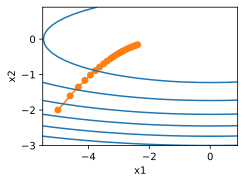

In [75]:
# f(x) = 0.1*x1^2 + 2*x2^2

# the iterative trajectory of the independent variable is smoother. However, due to the cumulative effect of the learning rate continuously decays, 
# so the independent variable does not move as much during later stages of iteration.

%matplotlib inline
import math
import torch
from d2l import torch as d2l

def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1: -0.002295, x2: -0.000000


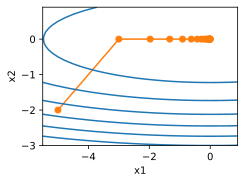

In [76]:
# As we increase the learning rate to 2 we see much better behavior. This already indicates that the decrease in learning rate might be rather aggressive, even in
# the noise-free case and we need to ensure that parameters converge appropriately.

eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

In [77]:
# Implementation from Scratch

def init_adagrad_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] += torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

loss: 0.243, 0.100 sec/epoch


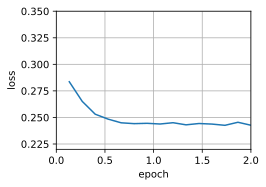

In [78]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adagrad, init_adagrad_states(feature_dim), {'lr': 0.1}, data_iter, feature_dim);

loss: 0.242, 0.066 sec/epoch


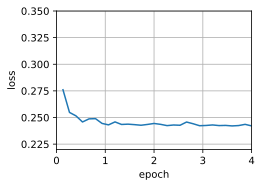

In [79]:
# Concise Implementation

trainer = torch.optim.Adagrad
d2l.train_concise_ch11(trainer, {'lr': 0.1}, data_iter)


##### Summary
- Adagrad decreases the learning rate dynamically on a per-coordinate basis.
- It uses the magnitude of the gradient as a means of adjusting how quickly progress is achieved - coordinates with large gradients are compensated with a smaller learning rate.
- Computing the exact second derivative is typically infeasible in deep learning problems due to memory and computational constraints. The gradient can be a useful proxy.
- If the optimization problem has a rather uneven structure Adagrad can help mitigate the distortion.
- Adagrad is particularly effective for sparse features where the learning rate needs to decrease more slowly for infrequently occurring terms.
- On deep learning problems Adagrad can sometimes be too aggressive in reducing learning rates. We will discuss strategies for mitigating this.

===============================RMSProp====================================


#### RMSProp Optimization (Detailed Explanation)

---

##### 1. The Problem with AdaGrad

In AdaGrad, parameters are updated as:
$$
\mathbf{s}_t = \mathbf{s}_{t-1} + \mathbf{g}_t^2, \quad
\mathbf{w}_{t+1} = \mathbf{w}_t - \frac{\eta}{\sqrt{\mathbf{s}_t + \epsilon}} \odot \mathbf{g}_t.
$$

Because $\mathbf{s}_t$ keeps **accumulating** squared gradients, it grows roughly linearly with $t$.  
This makes $\sqrt{\mathbf{s}_t}$ large over time, and the effective learning rate $\eta / \sqrt{\mathbf{s}_t}$ shrinks toward zero.

✅ Works fine for convex problems.  
🚫 But for non-convex deep learning problems, the learning rate decays too quickly, halting progress prematurely.

---

##### 2. The Idea Behind RMSProp

Tieleman and Hinton (2012) proposed **RMSProp** to fix AdaGrad's “vanishing learning rate” problem.

Instead of accumulating *all* past squared gradients, RMSProp maintains a **decaying moving average**:

$$
\mathbf{s}_t = \gamma \mathbf{s}_{t-1} + (1 - \gamma) \mathbf{g}_t^2,
$$

where $0 < \gamma < 1$ is the **decay rate** (typically 0.9).

This means older gradients “fade away” exponentially, preventing $\mathbf{s}_t$ from growing indefinitely.

---

##### 3. The RMSProp Update Rule

The RMSProp algorithm updates parameters as:

$$
\begin{aligned}
\mathbf{s}_t &\leftarrow \gamma \mathbf{s}_{t-1} + (1 - \gamma)\mathbf{g}_t^2, \\[4pt]
\mathbf{w}_{t+1} &\leftarrow \mathbf{w}_t - \frac{\eta}{\sqrt{\mathbf{s}_t + \epsilon}} \odot \mathbf{g}_t.
\end{aligned}
$$

Here:
- $\eta$ = learning rate  
- $\epsilon$ = small constant (e.g., $10^{-6}$) to prevent division by zero  
- $\odot$ = element-wise multiplication/division  

---

##### 4. Why It Works Better

| Algorithm | Accumulation Behavior | Effect |
|------------|-----------------------|---------|
| **AdaGrad** | $s_t = \sum g_t^2$ | Learning rate $\to 0$ (too slow) |
| **RMSProp** | $s_t = \gamma s_{t-1} + (1 - \gamma) g_t^2$ | Keeps $s_t$ bounded (stable learning) |

By maintaining an exponential moving average of squared gradients, RMSProp adapts learning rates *without* letting them decay to zero.

---

##### 5. Parameter Meanings

| Symbol | Meaning | Typical Value |
|---------|----------|---------------|
| $\eta$ | Base learning rate | 0.001 |
| $\gamma$ | Decay rate for running average | 0.9 |
| $\epsilon$ | Small constant for numerical stability | $10^{-6}$ |

---

##### 6. Expanded Form Intuition

Expanding the recursion gives:

$$
s_t = (1-\gamma)(g_t^2 + \gamma g_{t-1}^2 + \gamma^2 g_{t-2}^2 + \dots)
$$

Each past squared gradient contributes with exponentially decreasing weight $\gamma^k$.  
Hence, recent gradients dominate, making the update responsive to the most current information.

---

##### 7. Relation to Other Optimizers

| Optimizer | Core Idea |
|------------|-----------|
| **SGD** | Constant global learning rate |
| **AdaGrad** | Adaptive rate based on total gradient history |
| **RMSProp** | Adaptive rate using *exponential decay* of squared gradients |
| **Adam** | Combines RMSProp (adaptive rates) + Momentum (direction smoothing) |

---

##### 8. Key Intuition

> RMSProp = AdaGrad + exponential decay memory.  

RMSProp adapts each parameter’s step size using the recent magnitude of its gradients, preventing the learning rate from decaying too much.  
It keeps training stable and efficient in deep, non-convex optimization problems.

---

##### 9. Summary

- RMSProp **fixes** AdaGrad’s vanishing learning rate.  
- It uses an **exponential moving average** of squared gradients.  
- Maintains **adaptive learning rates** across parameters.  
- Works especially well in deep learning settings with noisy, non-stationary gradients.

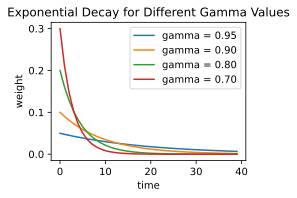

In [81]:
import math
import torch
from d2l import torch as d2l

d2l.set_figsize()
gammas = [0.95, 0.9, 0.8, 0.7]
for gamma in gammas:
    x = torch.arange(40).detach().numpy()
    d2l.plt.plot(x, (1-gamma) * gamma ** x, label=f'gamma = {gamma:.2f}')
d2l.plt.xlabel('time')
d2l.plt.ylabel('weight')
d2l.plt.legend()  # This shows the legend with gamma values
d2l.plt.title('Exponential Decay for Different Gamma Values')
d2l.plt.show()

epoch 20, x1: -0.010599, x2: 0.000000


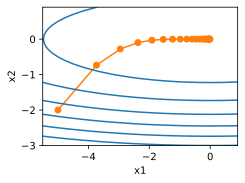

In [82]:
# Implementation from Scratch

def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

In [83]:
def init_rmsprop_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

def rmsprop(params, states, hyperparams):
    gamma, eps = hyperparams['gamma'], 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] = gamma * s + (1 - gamma) * torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

loss: 0.245, 0.069 sec/epoch


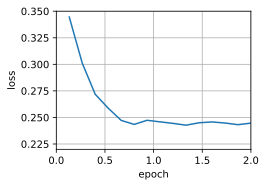

In [86]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(rmsprop, init_rmsprop_states(feature_dim), {'lr': 0.01, 'gamma': 0.9}, data_iter, feature_dim);

loss: 0.246, 0.063 sec/epoch


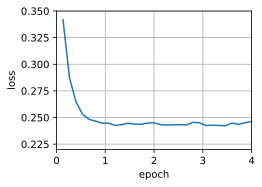

In [87]:
# Concise Implementation
trainer = torch.optim.RMSprop
d2l.train_concise_ch11(trainer, {'lr': 0.01, 'alpha': 0.9}, data_iter)

======================================Adadelta============================================


#### Adadelta Optimization (Detailed Explanation)

---

##### 1. Background: Why Adadelta?

**Adadelta** is an improved variant of AdaGrad and RMSProp proposed by *Matthew Zeiler (2012)*.  
It was designed to fix two main issues:

1. **AdaGrad**'s learning rate keeps shrinking to near zero because it accumulates all past squared gradients.
2. **RMSProp** stabilizes this using an exponential moving average, but still needs a manually chosen learning rate $\eta$.

Adadelta goes further:
- It **removes the explicit learning rate $\eta$**.
- It **balances the scale of parameter updates** automatically using statistics of past updates.

---

##### 2. Core Idea

Adadelta keeps two exponentially decaying averages:

1. $\mathbf{s}_t$: tracks the **second moment (variance)** of gradients.  
2. $\Delta \mathbf{x}_t$: tracks the **second moment** of parameter updates.

It uses these to rescale gradients so that the *units* of updates match the units of parameters.

---

##### 3. The Algorithm

##### (1) Accumulate squared gradients
$$
\mathbf{s}_t = \rho \mathbf{s}_{t-1} + (1 - \rho)\mathbf{g}_t^2
$$
where $\rho$ is the decay rate (e.g., 0.9).

---

##### (2) Compute rescaled gradient
$$
\mathbf{g}'_t = \frac{\sqrt{\Delta \mathbf{x}_{t-1} + \epsilon}}{\sqrt{\mathbf{s}_t + \epsilon}} \odot \mathbf{g}_t
$$

- Numerator: the RMS of past parameter updates.
- Denominator: the RMS of recent gradient magnitudes.
- Result: unit-consistent, self-scaled gradient $\mathbf{g}'_t$.

---

##### (3) Update parameters
$$
\mathbf{x}_{t+1} = \mathbf{x}_t - \mathbf{g}'_t
$$
No explicit $\eta$ is used — scaling happens automatically.

---

##### (4) Update the running average of squared updates
$$
\Delta \mathbf{x}_t = \rho \Delta \mathbf{x}_{t-1} + (1 - \rho)(\mathbf{g}'_t)^2
$$

This update is used in the next iteration’s numerator.

---

##### (5) Initialization
$$
\mathbf{s}_0 = 0, \quad \Delta \mathbf{x}_0 = 0, \quad \epsilon \approx 10^{-5}.
$$

---

##### 4. Intuitive Interpretation

Adadelta’s update magnitude is proportional to the **ratio of two RMS terms**:

$$
\text{update scale} \propto 
\frac{\text{RMS of past updates}}{\text{RMS of recent gradients}}.
$$

- Large gradients $\Rightarrow$ smaller steps.  
- Small gradients $\Rightarrow$ larger steps.  
- Balances magnitude automatically — no tuning required.

---

##### 5. Advantages over RMSProp

| Feature | RMSProp | Adadelta |
|----------|----------|-----------|
| Keeps running avg of gradients | ✅ | ✅ |
| Keeps running avg of updates | ❌ | ✅ |
| Requires learning rate $\eta$ | ✅ | ❌ |
| Unit-consistent scaling | ❌ | ✅ |

Thus, Adadelta removes the need for a fixed learning rate and adapts both scale and direction per parameter.

---

##### 6. Hyperparameters

| Symbol | Meaning | Typical Value |
|---------|----------|----------------|
| $\rho$ | Decay rate (smoothing factor) | 0.9 |
| $\epsilon$ | Numerical stability constant | $10^{-6}$ to $10^{-5}$ |

---

##### 7. Summary

- Adadelta = RMSProp + adaptive normalization for updates.  
- It tracks both gradient variance and update variance.  
- No manual learning rate $\eta$ required.  
- Automatically balances learning across all parameters.  
- Stable and efficient for deep networks with varying gradient scales.

---

##### 8. Full Set of Equations

$$
\begin{aligned}
\mathbf{s}_t &= \rho \mathbf{s}_{t-1} + (1 - \rho)\mathbf{g}_t^2, \\[6pt]
\mathbf{g}'_t &= \frac{\sqrt{\Delta \mathbf{x}_{t-1} + \epsilon}}{\sqrt{\mathbf{s}_t + \epsilon}} \odot \mathbf{g}_t, \\[6pt]
\mathbf{x}_{t+1} &= \mathbf{x}_t - \mathbf{g}'_t, \\[6pt]
\Delta \mathbf{x}_t &= \rho \Delta \mathbf{x}_{t-1} + (1 - \rho)(\mathbf{g}'_t)^2.
\end{aligned}
$$


In [88]:
%matplotlib inline
import torch
from d2l import torch as d2l


def init_adadelta_states(feature_dim):
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    delta_w, delta_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    for p, (s, delta) in zip(params, states):
        with torch.no_grad():
            # In-place updates via [:]
            s[:] = rho * s + (1 - rho) * torch.square(p.grad)
            g = (torch.sqrt(delta + eps) / torch.sqrt(s + eps)) * p.grad
            p[:] -= g
            delta[:] = rho * delta + (1 - rho) * g * g
        p.grad.data.zero_()

loss: 0.244, 0.085 sec/epoch


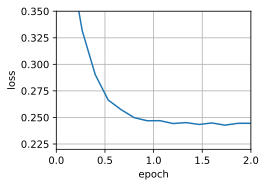

In [89]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adadelta, init_adadelta_states(feature_dim),
               {'rho': 0.9}, data_iter, feature_dim);

loss: 0.243, 0.068 sec/epoch


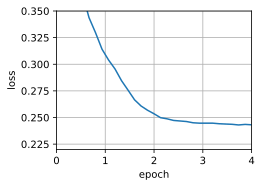

In [90]:
trainer = torch.optim.Adadelta
d2l.train_concise_ch11(trainer, {'rho': 0.9}, data_iter)

##### summary
- Adadelta has no learning rate parameter. Instead, it uses the rate of change in the parameters itself to adapt the learning rate.
- Adadelta requires two state variables to store the second moments of gradient and the change in parameters.
- Adadelta uses leaky averages to keep a running estimate of the appropriate statistics.

================================================Adam==============================================


#### Adam Optimizer (Detailed Explanation)

---

##### 1. Overview

**Adam** (Adaptive Moment Estimation) combines the benefits of **Momentum** and **RMSProp**.  
It adaptively adjusts the learning rate for each parameter based on both the **mean** and **variance** of the gradients.  
This makes it one of the most robust and widely used optimizers in deep learning.

---

##### 2. Core Concept

Adam maintains two exponentially decaying moving averages:

1. **First moment (mean):**
   $$
   \mathbf{v}_t = \beta_1 \mathbf{v}_{t-1} + (1 - \beta_1)\mathbf{g}_t
   $$
   Tracks the direction (momentum) of the gradient.

2. **Second moment (variance):**
   $$
   \mathbf{s}_t = \beta_2 \mathbf{s}_{t-1} + (1 - \beta_2)\mathbf{g}_t^2
   $$
   Tracks the magnitude (scale) of the gradient.

---

##### 3. Hyperparameters

| Symbol | Meaning | Typical Value |
|---------|----------|----------------|
| $\beta_1$ | Decay rate for momentum | 0.9 |
| $\beta_2$ | Decay rate for variance | 0.999 |
| $\epsilon$ | Numerical stability term | $10^{-8}$ |
| $\eta$ | Learning rate | 0.001 |

---

##### 4. Step-by-Step Algorithm

##### (1) Compute moving averages

$$
\mathbf{v}_t = \beta_1 \mathbf{v}_{t-1} + (1 - \beta_1)\mathbf{g}_t
$$
$$
\mathbf{s}_t = \beta_2 \mathbf{s}_{t-1} + (1 - \beta_2)\mathbf{g}_t^2
$$

---

##### (2) Bias correction

Since both $\mathbf{v}_0$ and $\mathbf{s}_0$ start at 0, Adam introduces bias-corrected estimates:

$$
\hat{\mathbf{v}}_t = \frac{\mathbf{v}_t}{1 - \beta_1^t}, \quad
\hat{\mathbf{s}}_t = \frac{\mathbf{s}_t}{1 - \beta_2^t}.
$$

This correction prevents early steps from being too small.

---

##### (3) Compute adaptive learning rate

$$
\mathbf{g}'_t = \frac{\eta \, \hat{\mathbf{v}}_t}{\sqrt{\hat{\mathbf{s}}_t} + \epsilon}.
$$

Here:
- $\hat{\mathbf{v}}_t$: smoothed gradient direction (momentum)
- $\hat{\mathbf{s}}_t$: adaptive scaling from RMSProp-style variance
- $\epsilon$: prevents division by zero

---

##### (4) Update parameters

$$
\mathbf{x}_{t+1} = \mathbf{x}_t - \mathbf{g}'_t
$$

This step combines both direction and adaptive scaling in one formula.

---

##### 5. Intuitive Understanding

Adam dynamically adapts its step size based on two ideas:
- **Momentum** → smooths noisy gradients using a moving average.
- **RMSProp** → normalizes by past gradient magnitudes to prevent exploding or vanishing steps.

Together:
$$
\text{Adam} = \text{Momentum} + \text{RMSProp (adaptive scaling)} + \text{Bias correction}.
$$

---

##### 6. Comparison with RMSProp

| Feature | RMSProp | Adam |
|----------|----------|------|
| Tracks gradient mean | ❌ | ✅ |
| Tracks gradient variance | ✅ | ✅ |
| Bias correction | ❌ | ✅ |
| Typical learning rate | 0.01 | 0.001 |
| Stability | Good | Excellent |
| Requires tuning | Some | Minimal |

---

##### 7. Full Set of Equations

$$
\begin{aligned}
\mathbf{v}_t &= \beta_1 \mathbf{v}_{t-1} + (1 - \beta_1)\mathbf{g}_t, \\[6pt]
\mathbf{s}_t &= \beta_2 \mathbf{s}_{t-1} + (1 - \beta_2)\mathbf{g}_t^2, \\[6pt]
\hat{\mathbf{v}}_t &= \frac{\mathbf{v}_t}{1 - \beta_1^t}, \\[6pt]
\hat{\mathbf{s}}_t &= \frac{\mathbf{s}_t}{1 - \beta_2^t}, \\[6pt]
\mathbf{x}_{t+1} &= \mathbf{x}_t - \frac{\eta \, \hat{\mathbf{v}}_t}{\sqrt{\hat{\mathbf{s}}_t} + \epsilon}.
\end{aligned}
$$

---

##### 8. Typical Hyperparameter Settings

| Parameter | Typical Value | Purpose |
|------------|----------------|----------|
| $\beta_1$ | 0.9 | Controls momentum smoothness |
| $\beta_2$ | 0.999 | Controls variance smoothness |
| $\eta$ | 0.001 | Step size scaling |
| $\epsilon$ | $10^{-8}$ | Numerical stability |

---

##### 9. Key Advantages

✅ Automatically adapts learning rate for each parameter.  
✅ Combines stability (RMSProp) and fast convergence (Momentum).  
✅ Works well with sparse and noisy gradients.  
✅ Minimal hyperparameter tuning required.

---

##### 10. Summary

Adam computes per-parameter adaptive learning rates using moment estimates of gradients.  
It balances **direction (momentum)** and **scale (RMS normalization)** —  
leading to efficient and stable optimization across a wide range of deep learning tasks.

---


In [91]:
%matplotlib inline
import torch
from d2l import torch as d2l


def init_adam_states(feature_dim):
    v_w, v_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = beta2 * s + (1 - beta2) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)
                                                       + eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1

loss: 0.247, 0.083 sec/epoch


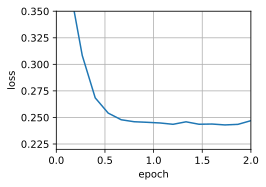

In [92]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adam, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim);


#### Yogi Optimizer (Detailed Explanation)

---

##### 1. Problem with Adam

While Adam performs well in practice, it can **fail to converge** even in convex problems. This happens because the **second moment estimate** $\mathbf{s}_t$ in Adam can **keep increasing indefinitely**.

Adam’s variance update:$\mathbf{s}_t = \beta_2 \mathbf{s}_{t-1} + (1 - \beta_2)\mathbf{g}_t^2$

If gradients fluctuate or are large early in training, $\mathbf{s}_t$ may blow up. As a result, the effective learning rate $\frac{1}{\sqrt{\mathbf{s}_t}}$ shrinks toward zero,causing very slow or stalled convergence.

---

##### 2. The Yogi Solution

**Yogi** (Zaheer et al., 2018) modifies Adam’s update for $\mathbf{s}_t$ to prevent this blow-up. Instead of always increasing $\mathbf{s}_t$ with $\mathbf{g}_t^2$, Yogi adjusts it *directionally*, depending on whether $\mathbf{g}_t^2$ is larger or smaller than $\mathbf{s}_{t-1}$.

##### Yogi’s update:
$$
\mathbf{s}_t = \mathbf{s}_{t-1} + (1 - \beta_2) \, \mathbf{g}_t^2 \odot \text{sgn}(\mathbf{g}_t^2 - \mathbf{s}_{t-1})
$$

Here:
- $\text{sgn}(\cdot)$ ensures that $\mathbf{s}_t$ only grows when needed and shrinks when gradients become smaller.
- The update magnitude depends on the **direction** of change rather than the size of deviation.

---

##### 3. Step-by-Step Algorithm

##### (1) Momentum term (same as Adam)
$$
\mathbf{v}_t = \beta_1 \mathbf{v}_{t-1} + (1 - \beta_1)\mathbf{g}_t
$$

##### (2) Stabilized second moment (Yogi)
$$
\mathbf{s}_t = \mathbf{s}_{t-1} + (1 - \beta_2)\mathbf{g}_t^2 \odot \text{sgn}(\mathbf{g}_t^2 - \mathbf{s}_{t-1})
$$

##### (3) Bias correction (same as Adam)
$$
\hat{\mathbf{v}}_t = \frac{\mathbf{v}_t}{1 - \beta_1^t}, \quad
\hat{\mathbf{s}}_t = \frac{\mathbf{s}_t}{1 - \beta_2^t}
$$

##### (4) Parameter update
$$
\mathbf{x}_{t+1} = \mathbf{x}_t - \frac{\eta \, \hat{\mathbf{v}}_t}{\sqrt{\hat{\mathbf{s}}_t} + \epsilon}
$$

---

##### 4. Intuitive Explanation

- Adam’s $\mathbf{s}_t$ accumulates **magnitude** of squared gradients → can explode.
- Yogi accumulates **direction of change** → keeps $\mathbf{s}_t$ bounded.
- This means:
  - If $\mathbf{g}_t^2 > \mathbf{s}_{t-1}$ → $\mathbf{s}_t$ increases.
  - If $\mathbf{g}_t^2 < \mathbf{s}_{t-1}$ → $\mathbf{s}_t$ decreases.

Hence, $\mathbf{s}_t$ adjusts smoothly and avoids runaway growth.

---

##### 5. Practical Notes

- Momentum term $\mathbf{v}_t$ is initialized as in Adam.
- Authors recommend initializing momentum from a larger mini-batch for smoother starts.
- Learning rate $\eta$ and hyperparameters $(\beta_1, \beta_2)$ remain the same as in Adam.

---

##### 6. Comparison: Adam vs Yogi

| Feature | Adam | Yogi |
|----------|------|------|
| Variance update | $\mathbf{s}_t = \beta_2 \mathbf{s}_{t-1} + (1 - \beta_2)\mathbf{g}_t^2$ | $\mathbf{s}_t = \mathbf{s}_{t-1} + (1 - \beta_2)\mathbf{g}_t^2 \odot \text{sgn}(\mathbf{g}_t^2 - \mathbf{s}_{t-1})$ |
| Variance blow-up | ❌ Possible | ✅ Avoided |
| Learning rate stability | ⚠️ Decreases too much | ✅ Stable |
| Convergence (convex) | ❌ Sometimes diverges | ✅ Converges |
| Additional cost | None | None |

---

##### 7. Key Benefits

✅ Prevents variance explosion and ensures stable learning rates.  
✅ Retains Adam’s fast convergence and adaptive learning.  
✅ Works better for both convex and non-convex optimization.  
✅ No new hyperparameters needed — same defaults as Adam.

---

##### 8. Summary

Yogi refines Adam by making the second moment update **sign-aware**:  
instead of blindly adding gradient squares, it adjusts the variance term based on whether gradients are increasing or decreasing.  
This leads to **bounded, stable learning rates** and **improved convergence** in practice.

loss: 0.246, 0.080 sec/epoch


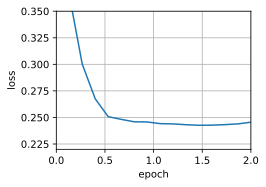

In [93]:
def yogi(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-3
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = s + (1 - beta2) * torch.sign(
                torch.square(p.grad) - s) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)
                                                       + eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1

data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(yogi, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim);

==================================Learning Rate Scheduling================================================

In [94]:
%matplotlib inline
import math
import torch
from torch import nn
from torch.optim import lr_scheduler
from d2l import torch as d2l


def net_fn():
    model = nn.Sequential(
        nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.Linear(16 * 5 * 5, 120), nn.ReLU(),
        nn.Linear(120, 84), nn.ReLU(),
        nn.Linear(84, 10))

    return model

loss = nn.CrossEntropyLoss()
device = d2l.try_gpu()

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

# The code is almost identical to `d2l.train_ch6` defined in the
# lenet section of chapter convolutional neural networks
def train(net, train_iter, test_iter, num_epochs, loss, trainer, device,
          scheduler=None):
    net.to(device)
    animator = d2l.Animator(xlabel='epoch', xlim=[0, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])

    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)  # train_loss, train_acc, num_examples
        for i, (X, y) in enumerate(train_iter):
            net.train()
            trainer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            train_loss = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % 50 == 0:
                animator.add(epoch + i / len(train_iter),
                             (train_loss, train_acc, None))

        test_acc = d2l.evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch+1, (None, None, test_acc))

        if scheduler:
            if scheduler.__module__ == lr_scheduler.__name__:
                # Using PyTorch In-Built scheduler
                scheduler.step()
            else:
                # Using custom defined scheduler
                for param_group in trainer.param_groups:
                    param_group['lr'] = scheduler(epoch)

    print(f'train loss {train_loss:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')

KeyboardInterrupt: 

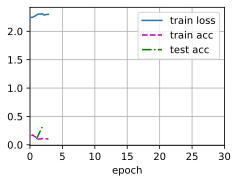

In [95]:
lr, num_epochs = 0.3, 30
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train(net, train_iter, test_iter, num_epochs, loss, trainer, device)

In [ ]:
lr = 0.1
trainer.param_groups[0]["lr"] = lr
print(f'learning rate is now {trainer.param_groups[0]["lr"]:.2f}')

In [ ]:
class SquareRootScheduler:
    def __init__(self, lr=0.1):
        self.lr = lr

    def __call__(self, num_update):
        return self.lr * pow(num_update + 1.0, -0.5)

In [ ]:
scheduler = SquareRootScheduler(lr=0.1)
d2l.plot(torch.arange(num_epochs), [scheduler(t) for t in range(num_epochs)])

In [ ]:
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr)
train(net, train_iter, test_iter, num_epochs, loss, trainer, device, scheduler)

In [ ]:
class FactorScheduler:
    def __init__(self, factor=1, stop_factor_lr=1e-7, base_lr=0.1):
        self.factor = factor
        self.stop_factor_lr = stop_factor_lr
        self.base_lr = base_lr

    def __call__(self, num_update):
        self.base_lr = max(self.stop_factor_lr, self.base_lr * self.factor)
        return self.base_lr

scheduler = FactorScheduler(factor=0.9, stop_factor_lr=1e-2, base_lr=2.0)
d2l.plot(torch.arange(50), [scheduler(t) for t in range(50)])

Factor Scheduler:
$\eta_{t+1} \leftarrow \max(\eta_{\min}, \eta_t \cdot \alpha)$

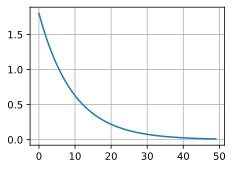

In [97]:
class FactorScheduler:
    def __init__(self, factor=1, stop_factor_lr=1e-7, base_lr=0.1):
        self.factor = factor
        self.stop_factor_lr = stop_factor_lr
        self.base_lr = base_lr

    def __call__(self, num_update):
        self.base_lr = max(self.stop_factor_lr, self.base_lr * self.factor)
        return self.base_lr

scheduler = FactorScheduler(factor=0.9, stop_factor_lr=1e-2, base_lr=2.0)
d2l.plot(torch.arange(50), [scheduler(t) for t in range(50)])

Multi Factor Scheduler

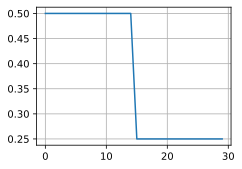

In [ ]:
# keep the learning rate piecewise constant and to decrease it by a given amount every so often.

net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr=0.5)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones=[15, 30], gamma=0.5)

def get_lr(trainer, scheduler):
    lr = scheduler.get_last_lr()[0]
    trainer.step()
    scheduler.step()
    return lr

d2l.plot(torch.arange(num_epochs), [get_lr(trainer, scheduler) for t in range(num_epochs)])

In [ ]:
train(net, train_iter, test_iter, num_epochs, loss, trainer, device, scheduler)

Cosine Scheduler

##### 1. Overview

Loshchilov and Hutter (2016) proposed a **cosine annealing** learning rate schedule,   a heuristic that smooths the decay of the learning rate over time.

The main idea is:
- Avoid reducing the learning rate too quickly at the beginning.
- Gradually lower it toward a small value at the end of training to allow fine-tuning.

This creates a **cosine-shaped decay** of the learning rate between an initial rate and a final target rate.

---

##### 2. The Formula

The learning rate at time step $t \in [0, T]$ is defined as: $\eta_t = \eta_T + \frac{\eta_0 - \eta_T}{2} \left( 1 + \cos\left( \frac{\pi t}{T} \right) \right)$

where:

- $\eta_0$: initial learning rate (at the start of training)  
- $\eta_T$: minimum or target learning rate (at the end of cycle)  
- $T $: total number of steps (or epochs) in one cosine decay cycle  
- $t$: current training step

---

##### 3. Behavior and Intuition

- At $t = 0$:  
  $\eta_t = \eta_0$(starts at the maximum learning rate)

- At $t = T$:  
  $\eta_t = \eta_T$(decays smoothly to the minimum learning rate)

- The cosine function ensures a **gradual and smooth decay** rather than an abrupt drop.

---

##### 4. When $t > T$

Once $t$ exceeds $T$, the learning rate stays constant at $\eta_T$. This prevents oscillations or increases beyond the target value.

---

##### 5. Practical Insight

This schedule allows:
- Faster convergence early in training.
- Finer adjustment near the end.
- Smoother transitions between epochs — often improving stability and final model accuracy.

The **cosine annealing** schedule provides a principled way to reduce the learning rate gradually,  
balancing fast convergence and stable fine-tuning. It is especially popular in modern optimizers such as **SGDR** and **AdamW**.


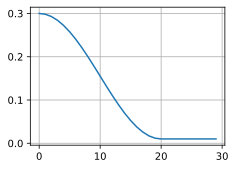

In [99]:
class CosineScheduler:
    def __init__(self, max_update, base_lr=0.01, final_lr=0,
               warmup_steps=0, warmup_begin_lr=0):
        self.base_lr_orig = base_lr
        self.max_update = max_update
        self.final_lr = final_lr
        self.warmup_steps = warmup_steps
        self.warmup_begin_lr = warmup_begin_lr
        self.max_steps = self.max_update - self.warmup_steps

    def get_warmup_lr(self, epoch):
        increase = (self.base_lr_orig - self.warmup_begin_lr) \
                       * float(epoch) / float(self.warmup_steps)
        return self.warmup_begin_lr + increase

    def __call__(self, epoch):
        if epoch < self.warmup_steps:
            return self.get_warmup_lr(epoch)
        if epoch <= self.max_update:
            self.base_lr = self.final_lr + (
                self.base_lr_orig - self.final_lr) * (1 + math.cos(
                math.pi * (epoch - self.warmup_steps) / self.max_steps)) / 2
        return self.base_lr

scheduler = CosineScheduler(max_update=20, base_lr=0.3, final_lr=0.01)
d2l.plot(torch.arange(num_epochs), [scheduler(t) for t in range(num_epochs)])

In [ ]:
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr=0.3)
train(net, train_iter, test_iter, num_epochs, loss, trainer, device, scheduler)

Warmup

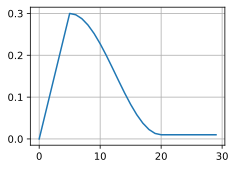

In [100]:
scheduler = CosineScheduler(20, warmup_steps=5, base_lr=0.3, final_lr=0.01)
d2l.plot(torch.arange(num_epochs), [scheduler(t) for t in range(num_epochs)])

In [ ]:
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr=0.3)
train(net, train_iter, test_iter, num_epochs, loss, trainer, device, scheduler)